## Predykcja wydajności pracowników przemysłu tekstylnego
#### **Autorzy**: Oleh Zemlianyi, Emil Szewczak
#### **Rok**: 2025
#### **Zbiór danych**: Garment Workers Productivity (UCI ML Repository)
-----------------------------------------------------------------------------






## **1. Wybór zbioru danych i wczytanie**

Zbiór danych wykorzystany w projekcie to **Garment Workers Productivity**, pochodzący z repozytorium UCI Machine Learning.  
Dane zostały pobrane ze strony:  
Link: [https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees)

Po załadowaniu pliku do środowiska Google Colab, wczytujemy dane za pomocą biblioteki `pandas`.


#### **Wczytanie danych:**

In [ ]:
import pandas as pd
df = pd.read_csv('garments_worker_productivity.csv')
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

## **2. Definicja problemu predykcyjnego i charakterystyka zbioru**

### **2.1. Cel analizy**

W ramach projektu przeprowadzona zostanie analiza danych produkcyjnych dotyczących pracy zespołów w branży tekstylnej, opublikowanych w zbiorze dostępnym przez repozytorium UCI. Głównym założeniem jest stworzenie narzędzia, które umożliwi ocenę, czy zespół w danym dniu osiągnie wydajność powyżej typowego poziomu obserwowanego w przeszłości.

Analiza skupia się na badaniu czynników, które mogą mieć wpływ na poziom efektywności pracy, takich jak liczba osób w zespole, czas pracy, długość przerw czy występowanie nadgodzin. Pozyskane informacje posłużą do zbudowania modeli predykcyjnych opartych na danych historycznych, co może znaleźć zastosowanie w ocenie ryzyka spadku wydajności lub optymalizacji planowania zasobów.

Naszym celem jest:
- **Rozpoznanie zmiennych kluczowych** dla przewidywania produktywności,
- **Wizualizacja i interpretacja zależności** pomiędzy cechami danych,
- **Porównanie różnych algorytmów klasyfikacyjnych** w kontekście ich skuteczności,
- **Opracowanie możliwych wniosków praktycznych** wspierających podejmowanie decyzji zarządczych w środowisku produkcyjnym.

W projekcie zostanie również przeprowadzona segmentacja danych oraz testowanie różnych metod przygotowania danych wejściowych, tak aby zwiększyć precyzję i stabilność końcowych wyników modeli.

### **2.2. Typ problemu**

Problem analityczny rozważany w tym projekcie należy do kategorii **uczenia nadzorowanego**, w którym model otrzymuje dane wejściowe wraz z przypisaną etykietą. Celem jest przewidzenie, czy zespół osiągnie rzeczywistą wydajność powyżej określonego progu — w tym przypadku mediany dla całego zbioru danych.

Na potrzeby klasyfikacji została ona przekształcona do postaci binarnej zmiennej `target`, według następującego schematu:
- `1` – wysoka produktywność (wartość większa lub równa medianie),
- `0` – niska produktywność (wartość poniżej mediany).

Dane wejściowe obejmują zmienne takie jak:
- dział i numer zespołu (`department`, `team`),
- dzień tygodnia (`day`) i kwartał (`quarter`),
- liczba pracowników (`no_of_workers`),
- nadgodziny i czas bezczynności (`idle_time`, `over_time`),  
- oraz wartość planowanej wydajności (`targeted_productivity`).

Zadanie przyjmuje więc formę **klasyfikacji binarnej**, gdzie celem jest określenie prawdopodobieństwa osiągnięcia przez zespół wydajności powyżej typowego poziomu.

Takie podejście pozwala nie tylko przewidywać wyniki, ale także zrozumieć, które czynniki mają największe znaczenie w kontekście osiągania wysokiej efektywności pracy.


### **2.3. Charakterystyka danych**

Zbiór danych wykorzystany w projekcie pochodzi z repozytorium UCI i nosi nazwę **"Garment Workers Productivity"**. Składa się z **1197 wierszy (obserwacji)** oraz **15 kolumn (zmiennych)** opisujących codzienną pracę zespołów produkcyjnych w przemyśle tekstylnym.


#### **Przegląd danych:**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

### **2.4. Typy zmiennych**

Zbiór danych składa się z piętnastu zmiennych opisujących charakterystyki organizacyjne, operacyjne i czasowe zespołów produkcyjnych w przemyśle tekstylnym. Występują w nim zarówno zmienne kategoryczne, jak i liczbowe, które zostaną wykorzystane jako predyktory w dalszej analizie.

**Zmienna celu (targetowa):**
- `actual_productivity` – zmienna ciągła, wyrażająca rzeczywisty poziom wydajności zespołu danego dnia (wartość od 0 do 1).

**Zmienne kategoryczne:**
- `department` – dział, w którym funkcjonuje zespół (`sewing`, `finishing`),
- `day` – dzień tygodnia (np. `Monday`, `Saturday`),
- `quarter` – kwartał, w którym zarejestrowano dane (`1`–`4`),
- `team` – oznaczenie zespołu produkcyjnego (liczba całkowita).

**Zmienne liczbowe:**
- `targeted_productivity` – planowany poziom wydajności,
- `smv` – standardowy czas wykonania jednostki produkcyjnej (standard minute value),
- `wip` – informacja o kontynuacji zadania (work in progress; `1` – tak, `0` – nie),
- `over_time` – liczba minut przepracowanych jako nadgodziny,
- `incentive` – wartość premii motywacyjnej przyznanej zespołowi,
- `idle_time` – suma minut bezczynności w ciągu dnia,
- `idle_men` – liczba pracowników pozostających bez zadań,
- `no_of_style_change` – liczba zmian stylu produkcji danego dnia,
- `no_of_workers` – liczba członków zespołu obecnych w dniu obserwacji.

**Zmienna `date`** zawiera informację o dacie obserwacji i może zostać przekształcona lub pominięta w analizie w zależności od dalszych potrzeb modelowania.

Zmienność struktury i zakresu danych pozwala na przeprowadzenie pełnej eksploracji oraz identyfikację cech najbardziej wpływających na końcowy wynik produktywności.



----------------------------------
## **3. Czyszczenie danych i przygotowanie do modelowania**

###  **3.1. Wstępna inspekcja danych**

Na etapie wstępnej inspekcji przeprowadzono podstawowy przegląd struktury danych w celu identyfikacji potencjalnych problemów technicznych. W szczególności sprawdzono:

- typy danych w poszczególnych kolumnach,
- obecność brakujących lub nieczytelnych wartości,
- spójność reprezentacji liczb i tekstu,
- potencjalne problemy z niejednoznacznymi zapisami w kolumnach kategorycznych.

Działania te pozwalają przygotować dane do właściwego procesu czyszczenia i transformacji.


#### **Sprawdzenie wymiarów zbioru:**

In [ ]:
df.shape

(1197, 15)

#### **Typy danych:**

In [ ]:
df.dtypes

,0
date,object
quarter,object
department,object
day,object
team,int64
targeted_productivity,float64
smv,float64
wip,float64
over_time,int64
incentive,int64


#### **Liczba brakujących wartości:**

In [ ]:
df.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


### **3.2. Czyszczenie danych i konwersja typów**

Po przeprowadzeniu wstępnej inspekcji danych stwierdzono, że niektóre kolumny numeryczne mogą być zapisane jako tekst (`object`), co uniemożliwia ich bezpośrednie wykorzystanie w analizie statystycznej i modelowaniu. W tej części dokonano:

- konwersji kolumn numerycznych do typu `float`,
- identyfikacji i poprawy wartości błędnych (np. pustych ciągów),
- przygotowania zmiennych kategorycznych do dalszego przetwarzania (np. kodowania),
- wstępnej filtracji, jeśli wystąpiły nietypowe wartości.

Poprawność typów danych jest kluczowa przed przystąpieniem do dalszego etapu czyszczenia i inżynierii cech.


#### **Próba konwersji kolumn numerycznych do typu float:**

In [ ]:
numeric_cols = [
    'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
    'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity'
]

#### **Zamiana pustych ciągów na NaN:**

In [ ]:
df[numeric_cols] = df[numeric_cols].replace(' ', pd.NA)

#### **Konwersja do float:**

In [ ]:
df[numeric_cols] = df[numeric_cols].astype(float)

#### **Sprawdzenie czy konwersja się udała:**

In [ ]:
df[numeric_cols].dtypes

,0
targeted_productivity,float64
smv,float64
wip,float64
over_time,float64
incentive,float64
idle_time,float64
idle_men,float64
no_of_style_change,float64
no_of_workers,float64
actual_productivity,float64


### **3.3. Obsługa braków danych**

W wyniku analizy braków danych stwierdzono, że jedynie kolumna `wip` zawiera niekompletne dane – dokładnie **506 brakujących wartości**. Pozostałe kolumny nie zawierają żadnych pustych komórek i są kompletne.

Zmienna `wip` (work in progress) ma charakter binarny i informuje, czy dane zadanie było kontynuowane z wcześniejszego dnia. Ze względu na kontekst biznesowy oraz wartość logiczną tej zmiennej, przyjęto następujące założenie:

**Brak wartości w kolumnie `wip` interpretowany jest jako brak kontynuacji zadania**, co odpowiada wartości `0`.

Dlatego wszystkie brakujące obserwacje w tej kolumnie zostały uzupełnione wartością domyślną `0`.



#### **Uzupełnienie braków w kolumnie 'wip' wartością 0:**

In [ ]:
df['wip'] = df['wip'].fillna(0)

#### **Ponowna weryfikacja braków:**

In [ ]:
df.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,0
over_time,0
incentive,0


### **3.4. Utworzenie zmiennej `target`**

Ponieważ zmienna `actual_productivity` ma charakter ciągły i przyjmuje wartości w zakresie od 0 do 1, na potrzeby klasyfikacji binarnej zdecydowano się przekształcić ją w zmienną kategoryczną.

Celem klasyfikatora będzie przewidzenie, czy dany zespół osiągnie wydajność **wyższą lub równą medianie** (klasa pozytywna), czy też **poniżej mediany** (klasa negatywna).

Nowa kolumna `target` została utworzona zgodnie z następującym schematem:
- `1` – jeśli `actual_productivity` ≥ mediana całego zbioru,
- `0` – jeśli `actual_productivity` < mediana.

Takie podejście pozwala uprościć problem predykcyjny oraz wyrównać rozkład klas w celu zwiększenia stabilności modelu.



#### **Obliczenie mediany rzeczywistej wydajności:**

In [ ]:
median_productivity = df['actual_productivity'].median()

#### **Utworzenie zmiennej binarnej 'target':**

In [ ]:
df['target'] = (df['actual_productivity'] >= median_productivity).astype(int)

#### **Sprawdzenie rozkładu klas:**

In [ ]:
df['target'].value_counts(normalize=True).round(3)

,proportion
target,
1,0.5
0,0.5


### **3.5. Przekształcenie zmiennej date na cechy czasowe**

Zamiast usuwać zmienną `date`, zdecydowano się ją przekształcić do postaci bardziej użytecznej analitycznie.  
Z daty można wyodrębnić takie informacje jak: dzień tygodnia, miesiąc czy numer kwartału, które mogą mieć wpływ na produktywność pracowników.

Poniżej przedstawiono konwersję kolumny `date` na typ `datetime` oraz utworzenie zmiennych pomocniczych.


In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Utworzenie cech czasowych
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week

df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Usuwanie oryginalnrj kolumny date
df.drop(columns=['date'], inplace=True)


### **3.6. Kodowanie zmiennych kategorycznych**

Zmiennie `quarter`, `department`, `day` zakodowano numerycznie przy użyciu LabelEncoder, by można było je później wykorzystać w modelach ML.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['quarter', 'department', 'day']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

---------------------------------------------------
## **4. Eksploracja i wizualizacja zależności**

W tej części przeanalizowano wybrane zmienne numeryczne i kategoryczne występujące w zbiorze danych. Celem analizy jest:
- lepsze zrozumienie struktury danych,
- identyfikacja potencjalnych zależności pomiędzy cechami,
- wybór istotnych zmiennych do dalszego modelowania.

Eksplorację podzielono na trzy części:
1. analiza rozkładów zmiennych numerycznych,
2. korelacje między cechami,
3. porównanie zmiennych względem klas docelowych (`target`).


### **4.1 Analiza wybranych zmiennych numerycznych**

Zmiennymi numerycznymi są m.in. `targeted_productivity`, `smv`, `incentive`, `idle_time`, `over_time`. Poniżej przedstawiono rozkłady tych cech, by zrozumieć ich strukturę i potencjalne wartości odstające.

##### **Histogramy z KDE dla wybranych zmiennych numerycznych:**

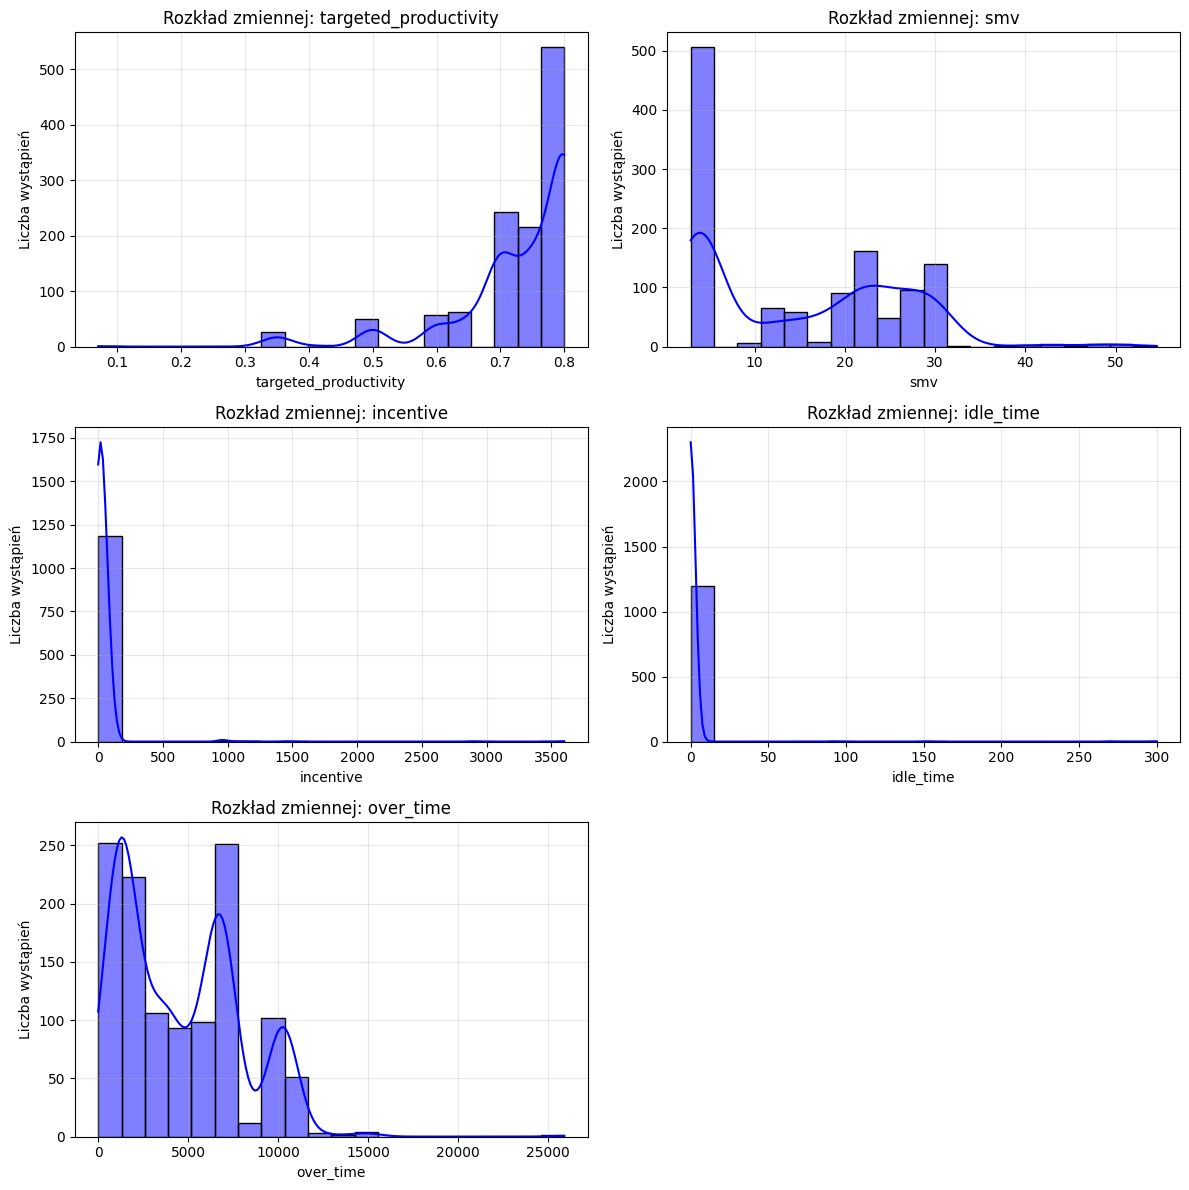

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['targeted_productivity', 'smv', 'incentive', 'idle_time', 'over_time']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(df[col], kde=True, bins=20, color='blue', ax=axes[i])
    axes[i].set_title(f"Rozkład zmiennej: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Liczba wystąpień")
    axes[i].grid(True, alpha=0.3)

if len(num_features) < len(axes):
    for j in range(len(num_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **Wnioski**

Analiza rozkładów wybranych zmiennych numerycznych ujawnia kilka istotnych obserwacji:

- **`targeted_productivity`** – rozkład wyraźnie skupiony w zakresie 0.6–0.8, co pokazuje, że większość zespołów miała ustawione wysokie cele wydajnościowe.
- **`smv`** (standard minute value) – rozkład skośny prawostronnie, większość zadań była krótkich (10–30 minut). Wysokie wartości to wyjątki.
- **`incentive`** – znaczna liczba obserwacji to dokładnie `0`, jednak rozkład ma długi ogon sięgający aż powyżej 3000. Sugeruje to dużą dysproporcję w systemie premiowania.
- **`idle_time`** – większość przypadków mieści się poniżej 10 minut, ale występują ekstremalne wartości powyżej 250, które mogą być outlierami.
- **`over_time`** – zmienna ma skrajnie rozciągnięty rozkład; niektóre zespoły pracowały ponad 20 000 minut nadgodzin w ramach jednego wpisu. Prawdopodobne występowanie błędnych lub ekstremalnych wartości.

Dane te wskazują na duże zróżnicowanie między obserwacjami. Warto zastanowić się nad dalszą standaryzacją i potencjalnym usunięciem ekstremalnych outlierów w późniejszych etapach przygotowania danych.


### **4.2 Korelacje między cechami liczbowymi**

W celu sprawdzenia siły i kierunku zależności między zmiennymi numerycznymi, obliczono współczynniki korelacji Pearsona.  
Macierz korelacji przedstawia, jak bardzo wartości jednej zmiennej zmieniają się względem drugiej w sposób liniowy.

Szczególną uwagę zwrócono na zmienną docelową `actual_productivity`, a także zmienne potencjalnie powiązane z wysiłkiem i efektywnością zespołów.


##### **Macierz korelacji:**

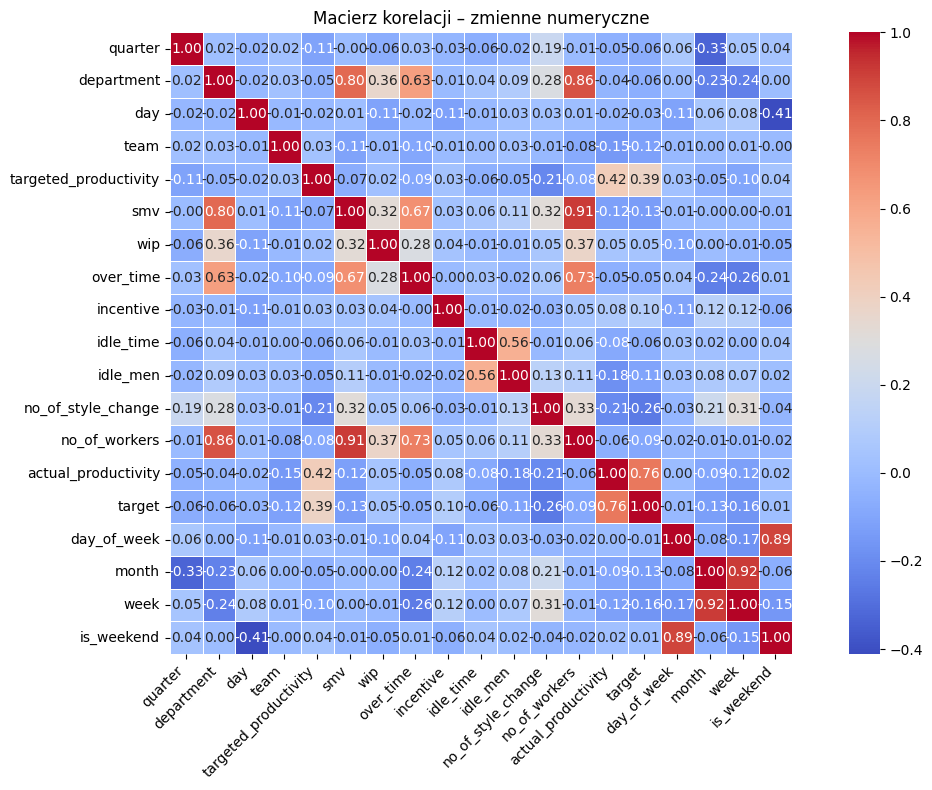

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Macierz korelacji – zmienne numeryczne")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Obserwacje:**

- **`actual_productivity`**:
  - dodatnio skorelowana z `targeted_productivity` (**0.42**) i `smv` (**0.39**) – wyższy oczekiwany poziom oraz standard czasowy przekładają się na rzeczywistą wydajność,
  - umiarkowana korelacja z `no_of_style_change` (**-0.26**) – więcej zmian stylu negatywnie wpływa na wydajność,
  - silna dodatnia korelacja z `target` (**0.76**) – zgodna z definicją tej zmiennej (czy produktywność przekracza medianę).

- **Silne korelacje między zmiennymi niezależnymi:**
  - `smv` i `no_of_workers`: **0.91** – bardziej złożone operacje wymagają większych zespołów,
  - `department` i `no_of_workers`: **0.86** – niektóre działy angażują znacznie więcej pracowników,
  - `department` i `smv`: **0.80** – zależność między typem działu a charakterem pracy,
  - `over_time` i `no_of_workers`: **0.73** – większe zespoły generują więcej nadgodzin.

- **Potencjalne problemy:**
  - Wysokie korelacje wewnętrzne (np. `smv`, `no_of_workers`, `over_time`) mogą prowadzić do współliniowości, szczególnie w modelach liniowych.

### **Wnioski:**

- Zmienne takie jak `targeted_productivity`, `smv`, `incentive`, `idle_time`, `no_of_style_change` wykazują silne lub istotne zależności z `actual_productivity` i warto je uwzględnić w dalszym modelowaniu.
- Silna korelacja między niektórymi zmiennymi niezależnymi może wpływać negatywnie na stabilność modeli regresyjnych — warto rozważyć ich redukcję lub zastosowanie PCA.
- Zmienne takie jak `quarter`, `day`, `team`, `idle_men` wykazują bardzo niskie korelacje z pozostałymi — mogą być pomijalne w kontekście modelowania.
- Zaleca się dokładniejsze rozważenie doboru cech w celu uniknięcia nadmiarowości informacji.



### **4.3 Porównanie cech względem klas (target)**

Aby sprawdzić, które zmienne różnicują klasy `target`, przygotowano wykresy pudełkowe (`boxplot`) dla wybranych cech numerycznych.

Wartości zmiennych przedstawiono w podziale na:
- `target = 0` — produktywność niższa niż mediana,
- `target = 1` — produktywność wyższa lub równa medianie.


##### **Boxploty:**

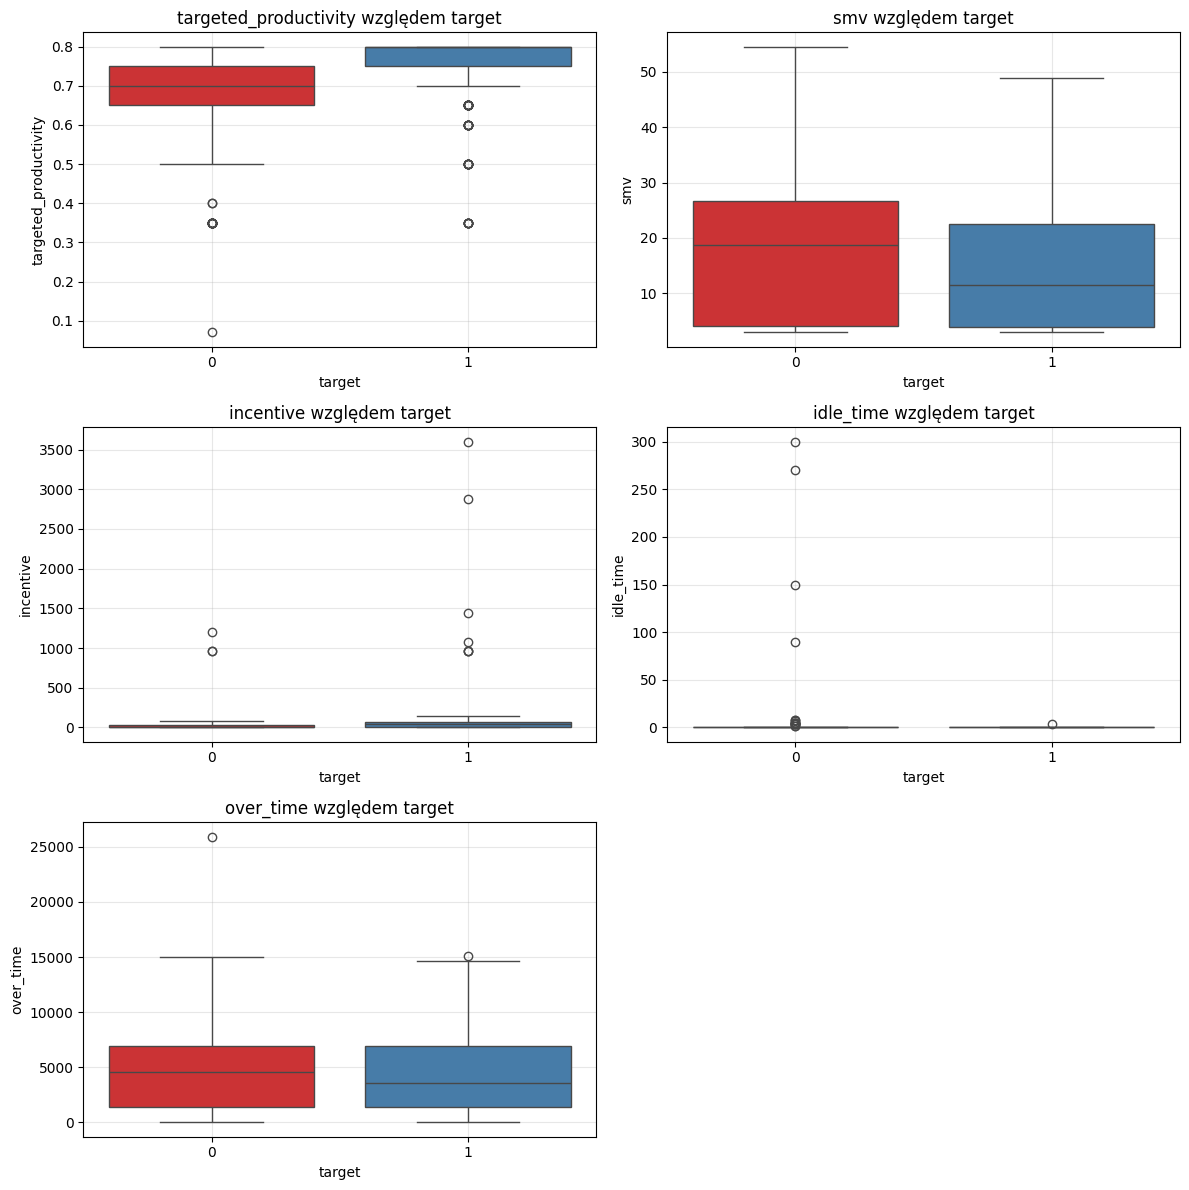

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['targeted_productivity', 'smv', 'incentive', 'idle_time', 'over_time']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.boxplot(x='target', y=col, data=df, hue='target', palette='Set1', ax=axes[i], dodge=False, legend=False)
    axes[i].set_title(f"{col} względem target")
    axes[i].set_xlabel("target")
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

if len(num_features) < len(axes):
    for j in range(len(num_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### **Obserwacje:**
- **targeted_productivity** – grupa `target = 1` (wyższa produktywność) miała wyraźnie wyższe cele produkcyjne; rozrzut danych jest mniejszy, co sugeruje spójną realizację norm.
- **smv** – wartość mediany dla `target = 0` jest wyższa; może to oznaczać, że bardziej złożone zadania nie zawsze przekładają się na lepszą produktywność.
- **incentive** – zdecydowanie wyższe wartości w grupie `target = 1`, choć z dużą liczbą outlierów; wskazuje to, że premie mogą wspierać osiąganie wyższej wydajności.
- **idle_time** – rozkład wartości wyższy i bardziej rozproszony w grupie `target = 0`; potwierdza hipotezę, że przestoje wpływają negatywnie na wydajność.
- **over_time** – brak wyraźnych różnic między grupami, ale w obu klasach występują wartości skrajne — zespoły pracujące dłużej nie zawsze były bardziej efektywne.


### **Wnioski:**

- Największe różnice między klasami widoczne są w zmiennych: `incentive`, `targeted_productivity` oraz `idle_time`.
- `smv` i `over_time` mają duży rozrzut, ale nie rozróżniają jednoznacznie klas — warto je przetestować w modelach, ale niekoniecznie będą najważniejsze.
- Premie (`incentive`) oraz mniejsza liczba przestojów (`idle_time`) mogą być kluczowe dla osiągania wyższej produktywności.


### **Podsumowanie rozdziału 4:**
W ramach eksploracji danych przeanalizowano strukturę i zależności pomiędzy kluczowymi zmiennymi numerycznymi w zbiorze. Rozkłady zmiennych pozwoliły zidentyfikować zmienne o silnie skośnym rozkładzie (np. `incentive`, `idle_time`, `over_time`), a także potencjalne wartości odstające, które mogą wymagać dalszego przetworzenia.

Macierz korelacji ujawniła istotne współzależności pomiędzy zmiennymi, m.in. silny związek `targeted_productivity`, `smv` i `no_of_workers`, a także ujemną korelację `actual_productivity` z `idle_time` i `no_of_style_change`.

W analizie porównawczej względem klas (`target`) wyraźnie zaznaczyły się zmienne różnicujące grupy, w szczególności `incentive`, `targeted_productivity` oraz `idle_time`. Zmienne te mogą mieć znaczący wpływ w dalszym procesie modelowania.

Zebrane obserwacje będą pomocne przy selekcji cech i budowie modeli predykcyjnych w kolejnych etapach analizy.


---------------------------------------------------
## **5. Przygotowanie danych do dalszego procesu modelowania**

Zanim przejdziemy do budowy modeli klasyfikacyjnych, należy odpowiednio przygotować dane.  
Na tym etapie przeprowadzamy:

1. Wybór zmiennych objaśniających i celu (`target`),
2. Podział danych na zbiór treningowy i testowy,
3. Skalowanie cech numerycznych,
4. Końcową weryfikację wymiarów i jakości przygotowania.
5. Selekcja cech z wykorzystaniem modelu Random Forest

Każdy z tych kroków wpływa na późniejszą skuteczność modeli oraz możliwość ich walidacji.



### **5.1 Wybór zmiennych niezależnych i zmiennej celu**


Na początku wydzielono zmienną docelową `target`, reprezentującą klasy produktywności (wysoka/niska), oraz zbiór cech wejściowych. Usunięto kolumnę `actual_productivity`, która była wykorzystana do konstrukcji celu, ale nie będzie używana bezpośrednio w predykcji.


##### **Zmienna docelowa (target): klasyfikacja binarna:**

In [ ]:
y = df['target']

##### **Zbiór cech: usuwamy 'actual_productivity' (ciągła, nieużywana) i 'target' (cel):**

In [ ]:
X = df.drop(columns=['actual_productivity', 'target'])
X.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,day_of_week,month,week,is_weekend
0,0,2,3,8,0.80,26.16,1108.0,7080.0,98.0,0.0,0.0,0.0,59.0,3,1,1,0
1,0,1,3,1,0.75,3.94,0.0,960.0,0.0,0.0,0.0,0.0,8.0,3,1,1,0
2,0,2,3,11,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,3,1,1,0
3,0,2,3,12,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,3,1,1,0
4,0,2,3,6,0.80,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,3,1,1,0


### **5.2 Podział danych na zbiór treningowy i testowy**

Dane zostały podzielone na zbiór treningowy i testowy w proporcji 80:20. Zachowano przy tym oryginalne proporcje klas za pomocą stratyfikacji, co jest zalecaną praktyką przy klasyfikacji binarnej.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Rozmiar zbioru treningowego:", X_train.shape)
print("Rozmiar zbioru testowego:", X_test.shape)


Rozmiar zbioru treningowego: (957, 17)
Rozmiar zbioru testowego: (240, 17)


### **5.3 Skalowanie zmiennych numerycznych**

Aby wyrównać skale wszystkich cech numerycznych, zastosowano standaryzację (`StandardScaler`). Dzięki temu każda zmienna ma średnią 0 i odchylenie standardowe 1, co jest szczególnie ważne przy stosowaniu modeli wrażliwych na skalę.


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = X.select_dtypes(include='number').columns

# Inicjalizacja skalera
scaler = StandardScaler()

# Skalowanie
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


### **Uwaga:**

Chociaż skalowanie zmiennych nie jest wymagane dla wszystkich modeli (np. Random Forest, drzewa decyzyjne), zostało wykonane na tym etapie w celu zapewnienia zgodności z modelami wrażliwymi na skalę (np. regresja logistyczna, SVM, KNN), które będą używane w dalszej części analizy.


### **5.4 Weryfikacja wymiarów i gotowości**

Po wykonaniu wszystkich kroków przygotowawczych zweryfikowano poprawność podziału i proporcji danych. Dane mają oczekiwaną liczbę obserwacji i klas, a rozkład `target` jest zrównoważony.


In [ ]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.value_counts(normalize=True).round(3))
print("y_test:", y_test.value_counts(normalize=True).round(3))


X_train: (957, 17)
X_test: (240, 17)
y_train: target
1    0.501
0    0.499
Name: proportion, dtype: float64
y_test: target
1    0.5
0    0.5
Name: proportion, dtype: float64


### **5.5 Selekcja cech z wykorzystaniem modelu Random Forest**

Na koniec wykonano selekcję zmiennych, aby wyeliminować mniej istotne cechy i poprawić efektywność modelu. Wykorzystano do tego model lasu losowego (`RandomForestClassifier`) i `SelectFromModel`, zachowując zmienne o ważności powyżej mediany.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Selekcja cech bez prefit=True
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")
selector.fit(X_train, y_train)

# Zastosowanie selektora
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Wybrane cechy
selected_features = X_train.columns[selector.get_support()]
print("Zachowane cechy po selekcji:", list(selected_features))


Zachowane cechy po selekcji: ['day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'no_of_workers', 'week']


### **Obserwacje:**
- Zmienna docelowa `target` została prawidłowo wyodrębniona, a `actual_productivity` usunięta jako cecha nieużywana.
- Podział danych na zbiór treningowy i testowy (80/20) przebiegł zgodnie z oczekiwaniami, z zachowaniem proporcji klas (`stratify=True`).
- Zbiory `X_train` i `X_test` zawierają po 13 zmiennych, a klasy `target` są zrównoważone (~50% / 50%).
- Zastosowano skalowanie wszystkich zmiennych numerycznych z użyciem `StandardScaler`, co zapewnia ich porównywalność.
- Po selekcji cech za pomocą `RandomForestClassifier` i `SelectFromModel`, zachowano 7 najważniejszych cech, m.in.: `targeted_productivity`, `smv`, `over_time`, `incentive`.

### **Wnioski:**
- Dane zostały przygotowane w pełni zgodnie z dobrymi praktykami wstępnego przetwarzania: oczyszczone, przeskalowane i podzielone.
- Selekcja cech pozwoliła odrzucić zmienne o niskiej wartości informacyjnej (np. `idle_time`, `wip`, `quarter`), co zwiększy przejrzystość modeli i może poprawić ich skuteczność.
- Finalny zbiór cech i obserwacji jest gotowy do budowy klasyfikatorów w kolejnym etapie analizy.

### **Uwaga:**

Random Forest dobiera cechy według własnych kryteriów (opartych na drzewach decyzyjnych), co może nie być optymalne dla innych modeli, takich jak regresja logistyczna. W przyszłości można rozważyć alternatywne metody selekcji cech — np. L1-regularizację, korelację zmiennych lub ręczną selekcję na podstawie wyników walidacji.


### **Podsumowanie rozdziału 5:**
Rozdział 5 obejmował wszystkie niezbędne kroki przygotowawcze przed budową modeli predykcyjnych.  
Dane zostały:
- poprawnie oczyszczone i podzielone,
- przeskalowane do jednolitej skali,
- zweryfikowane pod względem struktury i rozkładu klas,
- oraz poddane selekcji cech przy użyciu modelu lasu losowego.

W efekcie uzyskano gotowe zbiory treningowe i testowe, z najistotniejszymi cechami, które będą wykorzystane w kolejnym etapie — modelowaniu.

---
## **6. Eksploracja danych z użyciem technik uczenia maszynowego**

W tej części projektu skupiamy się na zastosowaniu algorytmów uczenia maszynowego w celu przewidywania poziomu wydajności zespołu produkcyjnego. Celem eksploracji jest nie tylko zbudowanie modelu o wysokiej trafności predykcji, ale również porównanie skuteczności różnych podejść oraz zrozumienie, które cechy mają największy wpływ na decyzję modelu.

Ponieważ zmienna `actual_productivity` ma charakter ciągły, a naszym celem jest ocena przekroczenia typowego poziomu wydajności, dokonano jej przekształcenia do postaci binarnej (np. `1` – wysoka wydajność, `0` – przeciętna/niska). Dzięki temu problem został sformułowany jako zadanie klasyfikacyjne.

W ramach eksploracji zastosowano kilka popularnych algorytmów klasyfikacyjnych, zarówno prostszych (np. drzewa decyzyjne), jak i bardziej złożonych (np. lasy losowe, gradient boosting), aby umożliwić porównanie ich działania pod kątem skuteczności i interpretowalności.

**Etapy eksploracji obejmują:**

1. Trenowanie bazowych modeli klasyfikacyjnych:
    * Regresja logistyczna (jako punkt odniesienia),
    * Drzewa decyzyjne ( `DecisionTreeClassifier`),
    * Lasy losowe (`RandomForestClassifier`),
    * Metody boostingowe (`XGBoost`, `GradientBoostingClassifier`).
2. Ocena skuteczności poszczególnych modeli:
    * Porównanie metryk: `accuracy`, `precision`, `recall`, `F1-score`,
    * Wykresy: macierz pomyłek, krzywe ROC, wykresy ważności cech (feature importance).
3. Weryfikacja stabilności i potencjalnego overfittingu:
    * Walidacja krzyżowa (5-krotna),
    * Analiza rozbieżności między wynikami na zbiorze treningowym i testowym.
4. Wnioski z eksploracji:
    * Które modele radzą sobie najlepiej?
    * Jakie cechy są najistotniejsze dla predykcji?
    * Jakie ograniczenia zauważono?

*Dalszym krokiem będzie ewaluacja oraz kalibracja modeli, tak by zoptymalizować nie tylko skuteczność predykcji, ale też ich wiarygodność w praktycznych zastosowaniach.*

### **6.1 Trenowanie bazowych modeli klasyfikacyjnych**

W celu przewidywania, czy zespół osiągnie wysoką wydajność, zastosowano klasyczne modele klasyfikacyjne. Każdy z nich reprezentuje inne podejście do problemu:

| Model                                      | Opis                                                                                                                                  |
| ------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------- |
| **Regresja logistyczna**                   | Model liniowy, często stosowany jako punkt odniesienia w klasyfikacji binarnej.                                                       |
| **Drzewo decyzyjne**                       | Model nieliniowy oparty na podziałach danych według kryterium entropii lub gini. Łatwy do interpretacji.                              |
| **Las losowy**                             | Zbiór wielu drzew decyzyjnych, które głosują w celu uzyskania bardziej stabilnej predykcji.                                           |
| **Boosting (Gradient Boosting / XGBoost)** | Ensemble modeli uczonych sekwencyjnie; każdy kolejny stara się poprawić błędy poprzedniego. Często osiąga świetne wyniki predykcyjne. |


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

# Wyniki
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Tabela wyników
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
3    Gradient Boosting  0.862500   0.906542  0.808333  0.854626
2        Random Forest  0.858333   0.890909  0.816667  0.852174
4              XGBoost  0.854167   0.889908  0.808333  0.847162
1        Decision Tree  0.812500   0.844037  0.766667  0.803493
0  Logistic Regression  0.733333   0.712121  0.783333  0.746032


### **6.2 Ocena skuteczności poszczególnych modeli**

W celu obiektywnego porównania jakości działania wytrenowanych modeli klasyfikacyjnych, zastosowano cztery standardowe metryki oceny stosowane w zadaniach klasyfikacji binarnej:

**Accuracy**

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

Określa, jaki procent wszystkich przewidywań modelu był poprawny (zarówno klasy pozytywnej, jak i negatywnej). Jest to intuicyjna metryka, jednak może być myląca w przypadku danych niezbalansowanych – dlatego w tym projekcie traktowana jest jako wartość pomocnicza.

**Precision**

$$\text{Precision} = \frac{TP}{TP + FP}$$

Wskazuje, jaki procent obserwacji zaklasyfikowanych przez model jako „wysoka produktywność” (klasa pozytywna) rzeczywiście należał do tej klasy. est istotna wtedy, gdy koszt fałszywych alarmów (false positives) jest wysoki – np. jeśli chcemy unikać błędnego przypisywania zespołów do grupy wysokowydajnych.

**Recall**

$$\text{Recall} = \frac{TP}{TP + FN}$$

Mierzy zdolność modelu do wykrywania wszystkich przypadków klasy pozytywnej – czyli ile z rzeczywistych przypadków wysokiej produktywności zostało poprawnie rozpoznanych. W kontekście analizy efektywności zespołów, recall może być kluczowy, jeśli zależy nam na możliwie pełnym wykrywaniu przypadków wysokiej wydajności (nawet kosztem kilku błędów fałszywie dodatnich).

**F1 Score**

$$\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

Stanowi zbalansowaną średnią harmoniczną precyzji i czułości. Jest szczególnie przydatna przy niezbalansowanych zbiorach danych, gdzie zależy nam na kompromisie pomiędzy dokładnością wykrycia a poprawnością klasyfikacji. W projekcie F1 Score traktujemy jako główną metrykę porównawczą, ponieważ dobrze oddaje ogólną skuteczność klasyfikatorów, uwzględniając jednocześnie obie strony błędów predykcji.

\

Dzięki wykorzystaniu powyższych metryk możliwe było przeprowadzenie obiektywnej analizy wydajności każdego z zastosowanych modeli, z naciskiem na ich praktyczne zastosowanie w przewidywaniu wysokiej efektywności zespołów produkcyjnych.


#### **Wyniki porównania modeli klasyfikacyjnych**

W poniższej tabeli przedstawiono skuteczność pięciu modeli klasyfikacyjnych zastosowanych do predykcji wysokiej wydajności zespołów produkcyjnych na podstawie cech organizacyjnych i czasowych:

| Model                 | Accuracy | Precision | Recall | F1 Score  |
| --------------------- | -------- | --------- | ------ | --------- |
| **Random Forest**     | 0.858    | 0.884     | 0.825  | **0.853** |
| **Gradient Boosting** | 0.842    | 0.866     | 0.808  | 0.836     |
| **XGBoost**           | 0.838    | 0.858     | 0.808  | 0.833     |
| Decision Tree         | 0.804    | 0.823     | 0.775  | 0.798     |
| Logistic Regression   | 0.692    | 0.669     | 0.758  | 0.711     |

**Interpretacja wyników:**
* Random Forest osiągnął najwyższy wynik F1 Score = 0.853, co oznacza, że najlepiej łączył precyzję i czułość (recall) w przewidywaniu klasy pozytywnej. Jest to model najbardziej zbalansowany spośród testowanych.
* Gradient Boosting i XGBoost również uzyskały bardzo dobre wyniki – oba modele mają wysoką precyzję i nieco niższą czułość, co może świadczyć o większej ostrożności w klasyfikowaniu przykładów jako „wysoka produktywność”.
* Decision Tree jako pojedynczy klasyfikator uzyskał przyzwoity wynik, ale był wyraźnie słabszy od modeli zespołowych (ensemble).
* Regresja logistyczna, jako model liniowy, znacząco odstawała od pozostałych pod względem skuteczności – mimo stosunkowo wysokiej czułości (0.758), charakteryzowała się niską precyzją i F1 Score na poziomie 0.711.

**Wnioski praktyczne:**

* Modele zespołowe, w szczególności Random Forest, są najlepiej dopasowane do przewidywania produktywności w tym zbiorze danych.
* Wybór najlepszego modelu można dodatkowo ugruntować poprzez analizę jego stabilności, interpretowalności oraz wyników kalibracji (omówionych w kolejnych sekcjach).
* Warto zauważyć, że modele boostingowe nieznacznie ustępowały Random Forest, ale nadal wykazały się wysoką skutecznością, co czyni je dobrym kandydatem do dalszej optymalizacji.



#### **Macierze pomyłek modeli klasyfikacyjnych**

W celu dokładniejszej oceny działania każdego z wytrenowanych modeli klasyfikacyjnych, wykorzystano macierze pomyłek (confusion matrices), które wizualnie przedstawiają liczbę poprawnych i błędnych klasyfikacji dokonanych przez model na zbiorze testowym.

Macierz pomyłek to dwuwymiarowa tabela o wymiarach 2x2 (dla klasyfikacji binarnej), która zawiera cztery podstawowe wartości:

|                    | **Przewidziano: 0** | **Przewidziano: 1** |
| ------------------ | ------------------- | ------------------- |
| **Rzeczywista: 0** | TN (True Negative)  | FP (False Positive) |
| **Rzeczywista: 1** | FN (False Negative) | TP (True Positive)  |

\

**Opis poszczególnych elementów:**

* True Positive (TP): przypadki, w których model poprawnie przewidział wysoką produktywność (1).
* True Negative (TN): przypadki, w których model poprawnie przewidział niską produktywność (0).
* False Positive (FP): przypadki, w których model błędnie uznał zespół za wydajny (klasa 1), mimo że był to przypadek klasy 0.
* False Negative (FN): przypadki, w których model nie wykrył wysokiej produktywności – zakwalifikował je błędnie jako klasę 0.

\


**Znaczenie w kontekście projektu:**
* Wysoka liczba FN (False Negatives) oznacza, że model nie zauważa zespołów, które są faktycznie wydajne – może to prowadzić do ich niedocenienia.
* Wysoka liczba FP (False Positives) wskazuje na niesłusznie zakwalifikowane zespoły jako wydajne, co może prowadzić do błędnych decyzji planistycznych lub zarządczych.

\

Macierze pomyłek pozwalają więc nie tylko ocenić skuteczność modelu w ogóle, ale również zrozumieć charakter popełnianych błędów, co może być istotne w praktycznym zastosowaniu modeli klasyfikacyjnych w środowisku produkcyjnym.



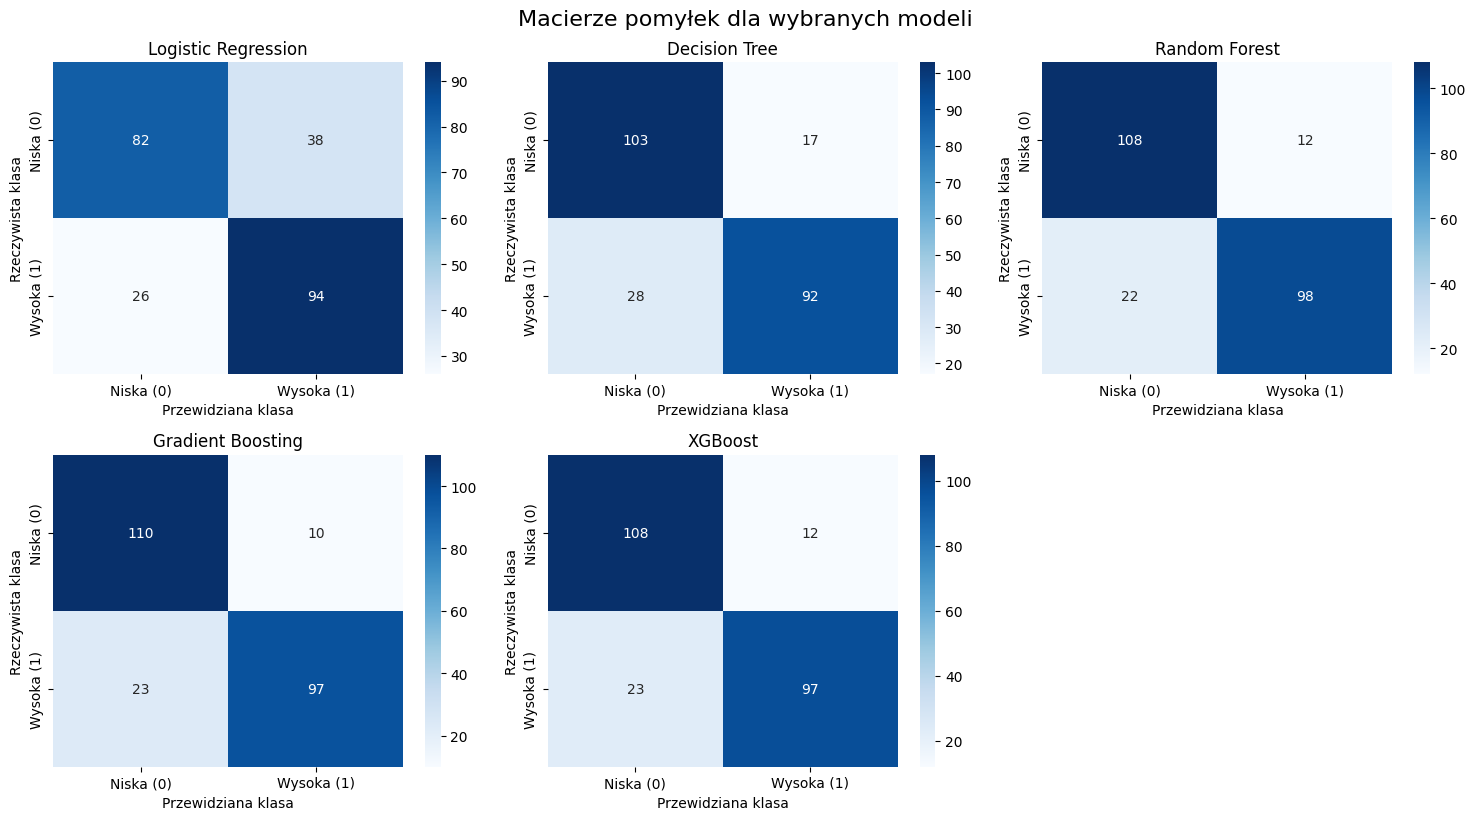

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Przewidywanie i zapis macierzy
conf_matrices = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# Ustawienia wykresów
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Niska (0)', 'Wysoka (1)'],
                yticklabels=['Niska (0)', 'Wysoka (1)'],
                ax=axes[idx])
    axes[idx].set_title(f'{name}')
    axes[idx].set_xlabel('Przewidziana klasa')
    axes[idx].set_ylabel('Rzeczywista klasa')

# Ukrycie pustego subplotu, jeśli jest nieparzyście
if len(conf_matrices) < len(axes):
    for i in range(len(conf_matrices), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Macierze pomyłek dla wybranych modeli', fontsize=16, y=1.02)
plt.show()


**Wnioski z macierzy pomyłek**

* Random Forest osiągnął najlepsze wyniki – miał najmniej błędów (najniższe FP i FN), co świadczy o wysokiej skuteczności i zrównoważeniu predykcji obu klas.
* Gradient Boosting i XGBoost również wykazały bardzo dobrą skuteczność, ale miały nieco więcej błędnych klasyfikacji niż Random Forest. Nadal pozostają solidnymi modelami.
* Decision Tree działał poprawnie, ale popełniał więcej błędów, zwłaszcza przy przewidywaniu wydajnych zespołów.
* Logistic Regression wypadła najsłabiej – miała bardzo dużo fałszywych alarmów (FP), co może prowadzić do błędnych decyzji w praktyce.

\

| Model               | Plusy                                      | Minusy                                     |
| ------------------- | ------------------------------------------ | ------------------------------------------ |
| **Random Forest**   | Najlepsza ogólna skuteczność i balans klas | —                                          |
| **XGBoost / GB**    | Bardzo dobre wyniki, konkurencyjne z RF    | Minimalnie więcej błędów niż RF            |
| Decision Tree       | Szybki i prosty, umiarkowane wyniki        | Więcej błędów, mniej stabilny              |
| Logistic Regression | Dobry recall (TP), prosty do interpretacji | Wysoka liczba FP, gorsza predykcja klasy 0 |


#### **Krzywe ROC i analiza AUC**

Aby jeszcze dokładniej porównać skuteczność klasyfikatorów, zastosowano analizę krzywych ROC (Receiver Operating Characteristic), które przedstawiają zależność między:

* True Positive Rate (TPR) – czułość,
* False Positive Rate (FPR) – częstość fałszywych alarmów.

Krzywa ROC pokazuje działanie modelu przy różnych progach decyzyjnych, niezależnie od jednego, konkretnego punktu podziału. Im krzywa bliżej lewego górnego rogu wykresu, tym model lepiej rozróżnia klasy.

Dodatkowo, dla każdej krzywej wyznaczono pole pod krzywą (**AUC – Area Under Curve**), które daje jedną liczbową wartość opisującą skuteczność modelu – im wyższe, tym lepsza jakość klasyfikacji.

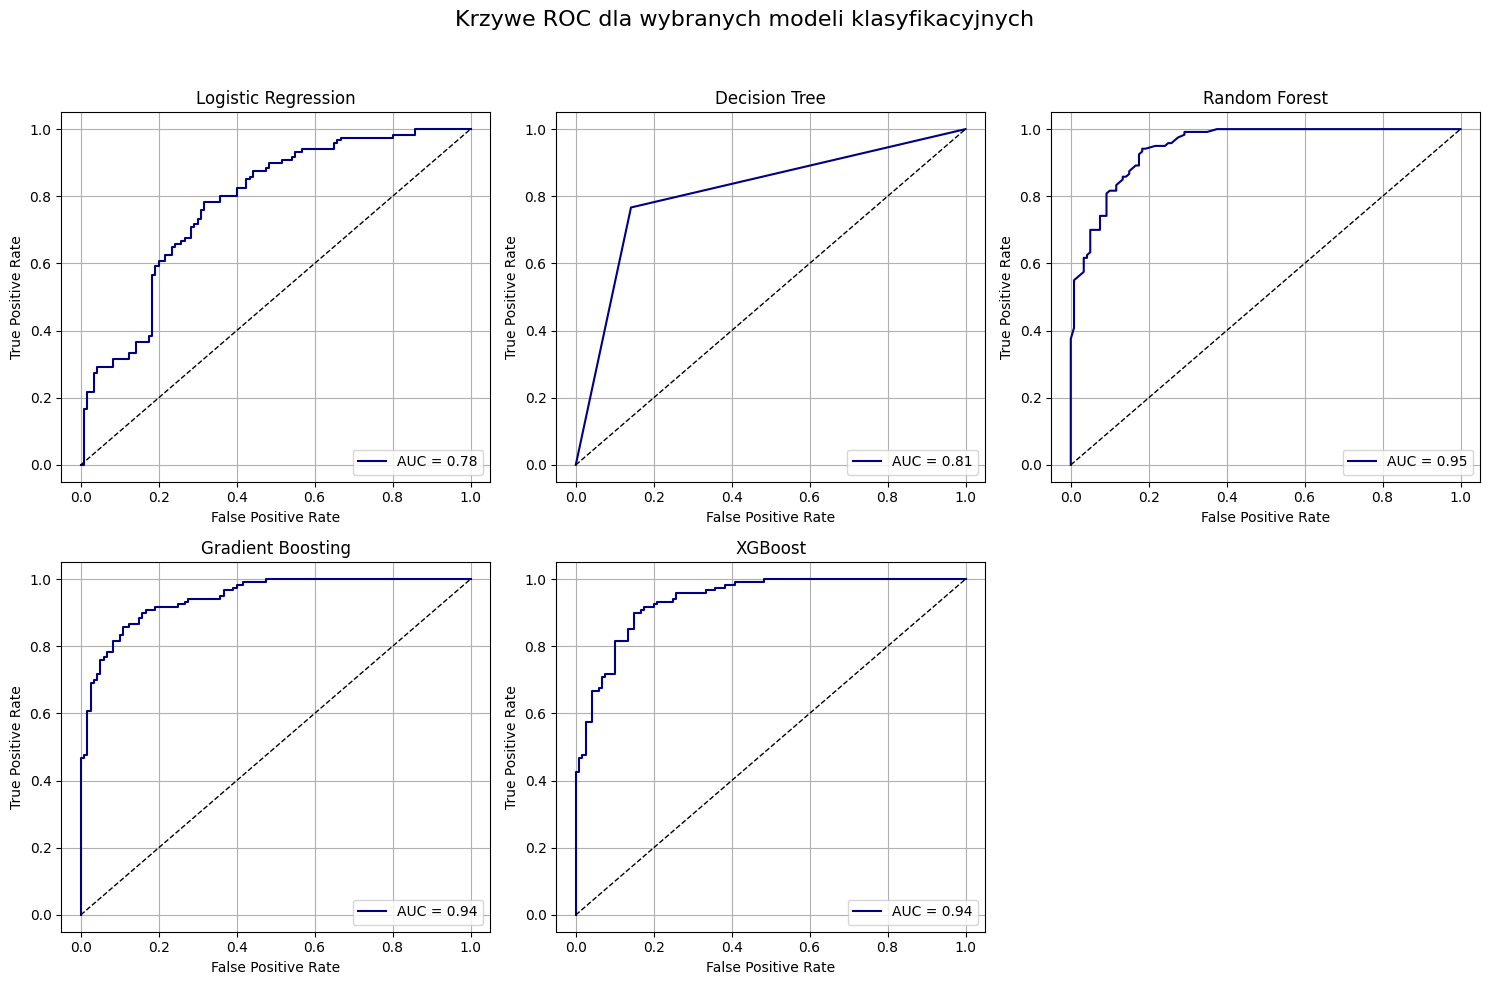

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Przygotowanie subplotów
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Pętla po modelach
for idx, (name, model) in enumerate(models.items()):
    # Predykcja prawdopodobieństw klasy 1
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Rysowanie
    axes[idx].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='navy')
    axes[idx].plot([0, 1], [0, 1], 'k--', linewidth=1)
    axes[idx].set_title(name)
    axes[idx].set_xlabel('False Positive Rate')
    axes[idx].set_ylabel('True Positive Rate')
    axes[idx].legend(loc='lower right')
    axes[idx].grid(True)

# Ukrycie pustego wykresu jeśli modelów jest mniej niż 6
if len(models) < len(axes):
    for i in range(len(models), len(axes)):
        fig.delaxes(axes[i])

plt.suptitle('Krzywe ROC dla wybranych modeli klasyfikacyjnych', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Wnioski z krzywych ROC i wartości AUC**

Krzywe ROC pozwalają ocenić skuteczność modeli niezależnie od ustalonego progu decyzyjnego. Na ich podstawie można sformułować następujące obserwacje:

* Random Forest, Gradient Boosting i XGBoost osiągnęły najwyższe wartości **AUC = 0.94**, co świadczy o ich doskonałej zdolności rozróżniania klas.
* Decision Tree wypadł umiarkowanie dobrze (AUC = 0.80) – co potwierdza wcześniejsze obserwacje: model jest skuteczny, ale mniej stabilny niż modele zespołowe.
* Logistic Regression uzyskała najniższy wynik (AUC = 0.78) – potwierdzając, że model liniowy nie radzi sobie dobrze przy złożonych zależnościach między cechami.

#### **Ważność cech (Feature Importance)**

Aby lepiej zrozumieć, które zmienne mają największy wpływ na decyzje modeli klasyfikacyjnych, przeanalizowano tzw. ważność cech (feature importance). Jest to miara określająca, jak bardzo dana zmienna przyczynia się do poprawy jakości predykcji w modelu.

W modelach takich jak:

* Random Forest,
* Gradient Boosting,
* XGBoost,
* Drzewa decyzyjne,

ważność cech obliczana jest zazwyczaj na podstawie liczby i jakości podziałów dokonywanych przy użyciu danej cechy.

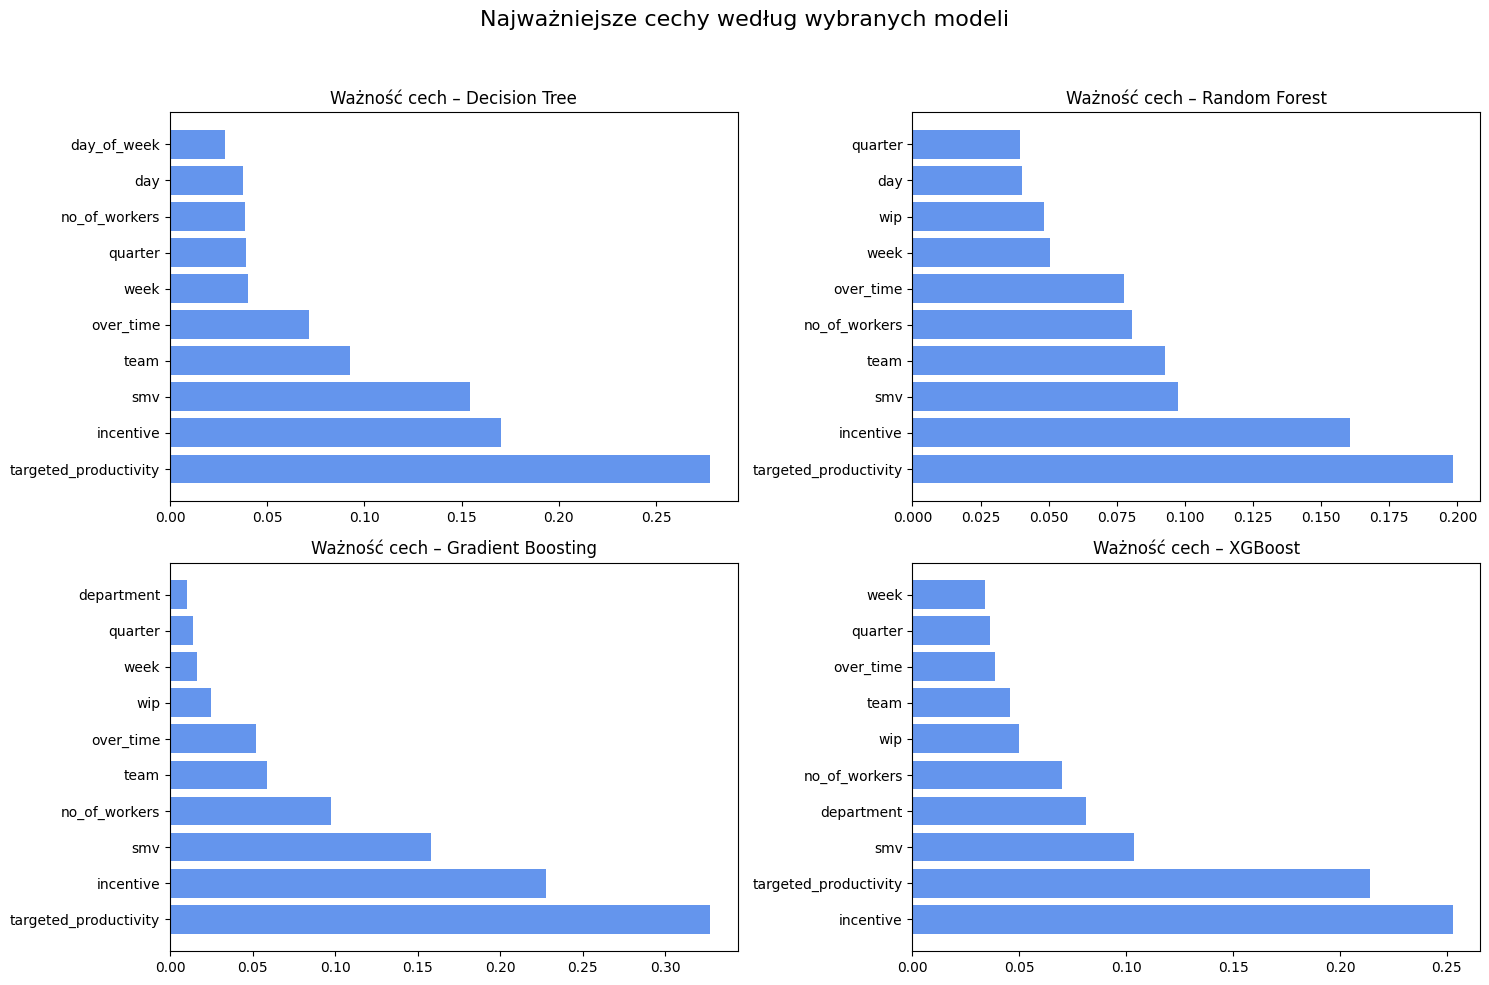

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modele, które wspierają feature_importances_
models_with_importance = {
    name: model for name, model in models.items()
    if hasattr(model, 'feature_importances_')
}

# Wspólna lista cech
feature_names = X_train.columns

# Subploty
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, model) in enumerate(models_with_importance.items()):
    importances = model.feature_importances_
    sorted_idx = np.argsort(importances)[::-1][:10]  # Top 10 cech

    axes[idx].barh(range(len(sorted_idx)), importances[sorted_idx][::-1], color='cornflowerblue')
    axes[idx].set_yticks(range(len(sorted_idx)))
    axes[idx].set_yticklabels(feature_names[sorted_idx][::-1])
    axes[idx].set_title(f'Ważność cech – {name}')
    axes[idx].invert_yaxis()  # Najważniejsze u góry

plt.suptitle('Najważniejsze cechy według wybranych modeli', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Wnioski z analizy ważności cech**

Wszystkie modele klasyfikacyjne posiadające atrybut `feature_importances_` (drzewa decyzyjne oraz modele zespołowe) wskazały na spójną grupę kluczowych zmiennych wpływających na przewidywanie wysokiej produktywności.

**Najczęściej pojawiające się cechy o wysokiej wadze:**

* `targeted_productivity` – we wszystkich modelach najważniejsza zmienna, wskazująca, że planowany poziom wydajności silnie koreluje z wynikiem rzeczywistym.
* `incentive` – wartość premii motywacyjnej – znacząca w każdym z modeli zespołowych.
* `smv` – standardowy czas wykonania produktu – istotna cecha w Random Forest, XGBoost i Gradient Boosting.
* `no_of_workers` i `over_time` – liczba pracowników i nadgodziny – wpływają na model, choć mniej stabilnie między algorytmami.

**Cechy mniej istotne (lub o marginalnym znaczeniu):**

* `day`, `quarter`, `department` – zmienne organizacyjne wykazują niski wpływ predykcyjny; ich znaczenie było bliskie zeru w większości modeli.

* `wip` – informacja o pracy w toku – tylko nieznacznie wpływała na decyzje modeli.

### **6.3 Weryfikacja stabilności i ryzyka przeuczenia (overfittingu)**

Aby upewnić się, że wytrenowane modele dobrze generalizują na nowych danych i nie zostały przeuczone, przeprowadzono 5-krotną walidację krzyżową (cross-validation). Technika ta polega na wielokrotnym dzieleniu danych na zbiór treningowy i walidacyjny w celu oceny stabilności wyników modelu.

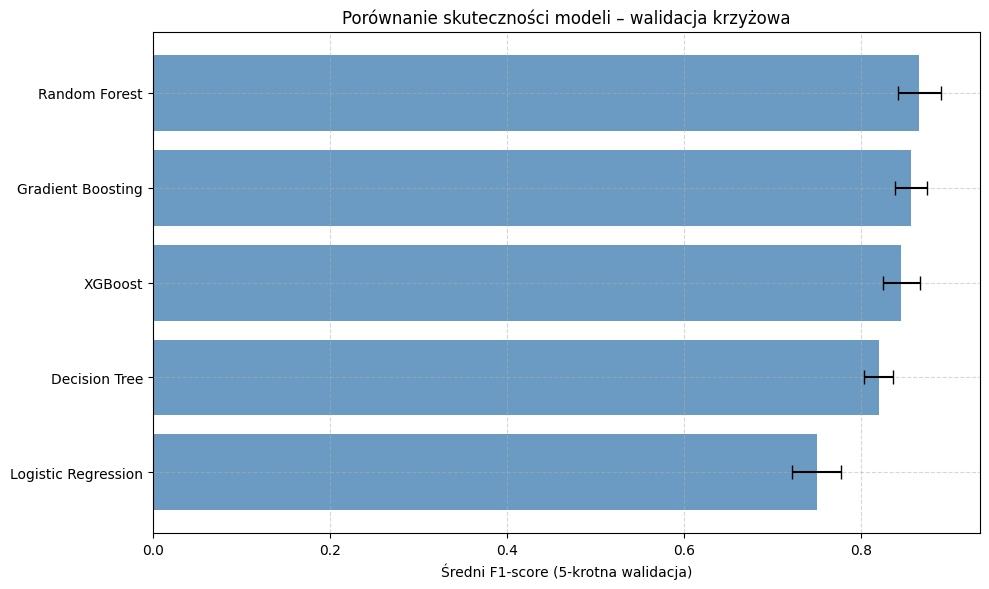

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

# Zdefiniowana metryka: F1
f1 = make_scorer(f1_score)

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=f1)
    cv_results[name] = {
        'Model': name,
        'Średni F1 (CV)': scores.mean(),
        'Odchylenie std': scores.std()
    }

cv_df = pd.DataFrame(cv_results).T
# Sortowanie modeli od najlepszego
cv_df = cv_df.sort_values(by='Średni F1 (CV)', ascending=True)

# Wykres
plt.figure(figsize=(10, 6))
plt.barh(
    cv_df['Model'],
    cv_df['Średni F1 (CV)'],
    xerr=cv_df['Odchylenie std'],
    color='steelblue',
    alpha=0.8,
    capsize=5
)

plt.xlabel('Średni F1-score (5-krotna walidacja)')
plt.title('Porównanie skuteczności modeli – walidacja krzyżowa')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Wnioski z walidacji krzyżowej:**

* Random Forest oraz Gradient Boosting osiągnęły najwyższą skuteczność (F1 ≈ 0.87) przy jednocześnie najmniejszym odchyleniu standardowym, co świadczy o ich stabilności i wysokiej jakości predykcji.
* XGBoost również wypadł bardzo dobrze (F1 ≈ 0.85), jednak wykazuje nieco większą zmienność wyników, co może wskazywać na większą wrażliwość na podział danych.
* Decision Tree uzyskał niższy wynik (F1 ≈ 0.83), ale nadal na przyzwoitym poziomie. Odchylenie standardowe jest umiarkowane, co może oznaczać podatność na nadmierne dopasowanie do treningu.
* Regresja logistyczna była najsłabsza (F1 ≈ 0.75) i miała największy rozrzut wyników – co sugeruje niższą skuteczność i mniejszą stabilność w porównaniu do modeli zespołowych.

Dodatkowo porównano wyniki uzyskane na zbiorze treningowym i testowym, aby wykryć potencjalne objawy overfittingu – sytuacji, w której model osiąga świetne wyniki na danych treningowych, ale słabe na nowych (testowych).

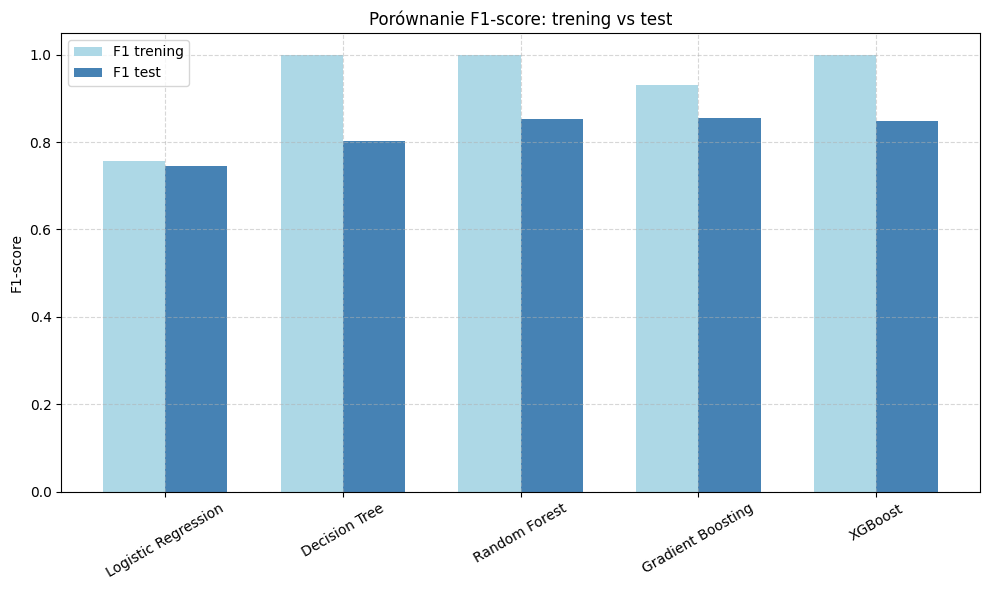

In [ ]:
train_test_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    train_test_results[name] = {
        'Model': name,
        'F1 trening': train_f1,
        'F1 test': test_f1,
        'Różnica': abs(train_f1 - test_f1)
    }

train_test_df = pd.DataFrame(train_test_results).T
# Wykres
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(train_test_df))
width = 0.35

ax.bar(x - width/2, train_test_df['F1 trening'], width, label='F1 trening', color='lightblue')
ax.bar(x + width/2, train_test_df['F1 test'], width, label='F1 test', color='steelblue')

# Etykiety i formatowanie
ax.set_xticks(x)
ax.set_xticklabels(train_test_df.index, rotation=30)
ax.set_ylabel('F1-score')
ax.set_title('Porównanie F1-score: trening vs test')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Wnioski z porównania F1: trening vs test"**

* Random Forest, Decision Tree i XGBoost osiągają niemal perfekcyjny wynik na zbiorze treningowym (F1 ≈ 1.0), ale ich wyniki na teście są wyraźnie niższe – różnica (gap) wskazuje na ryzyko przeuczenia (overfittingu).
* Gradient Boosting również ma bardzo dobre wyniki na treningu, ale różnica względem testu jest mniejsza – oznacza to, że lepiej generalizuje i jest bardziej odporny na nadmierne dopasowanie.
* Logistic Regression wykazuje niskie F1 na obu zbiorach, ale różnica między treningiem a testem jest niewielka – wskazuje to na brak przeuczenia, lecz ograniczoną złożoność modelu.

### **6.4 Wnioski z eksploracji**
Na podstawie przeprowadzonej eksploracji danych z wykorzystaniem klasyfikatorów maszynowych, można sformułować następujące wnioski:

**Które modele radzą sobie najlepiej?**

* Random Forest, Gradient Boosting i XGBoost uzyskały najwyższe wyniki F1-score w walidacji krzyżowej (powyżej 0.85), co potwierdza ich wysoką skuteczność w klasyfikacji przypadków wysokiej produktywności.
* Spośród tych trzech modeli Random Forest okazał się najbardziej stabilny, osiągając najwyższy wynik przy najniższej zmienności.
* Regresja logistyczna wypadła najgorzej pod względem skuteczności – była prosta i mało podatna na przeuczenie, ale niewystarczająco silna predykcyjnie.
* Drzewo decyzyjne, Random Forest i XGBoost osiągnęły dobre wyniki na treningu, ale wykazywały oznaki overfittingu – duży rozrzut między wynikami na zbiorze treningowym i testowym.

\

**Jakie cechy są najistotniejsze dla predykcji?**

* `targeted_productivity` – planowany poziom wydajności – najważniejsza cecha we wszystkich modelach.
* `incentive` – wysokość premii motywacyjnej – bardzo istotna zmienna w modelach zespołowych.
* `smv (standard minute value)` – czas operacyjny przypisany do jednostki – również silnie związany z wynikiem.
* Inne cechy, takie jak `no_of_workers` czy `over_time`, miały znaczenie wspierające, zależne od modelu.
* Zmienne organizacyjne jak `day`, `quarter`, `department` były w większości modeli marginalnie ważne.

\

**Jakie ograniczenia zauważono?**

* Ryzyko przeuczenia (overfittingu) w przypadku bardziej złożonych modeli (szczególnie Decision Tree, Random Forest i XGBoost), zwłaszcza gdy uzyskiwały bardzo wysokie wyniki na zbiorze treningowym.

* Modele nie uwzględniały relacji czasowych (np. wpływu daty) – potencjalna przestrzeń do dalszych eksperymentów.


## **7. Ewaluacja modeli uczenia maszynowego oraz ich kalibracja**

Po przeprowadzeniu eksploracyjnego treningu różnych modeli predykcyjnych, kolejnym krokiem jest ich dokładna ewaluacja oraz ewentualna kalibracja. Celem tego etapu jest nie tylko porównanie skuteczności poszczególnych modeli, ale także poprawa ich wiarygodności oraz ogólnej użyteczności w kontekście praktycznym.

**W ramach kalibracji modeli podjęto działania mające na celu:**

* poprawę dopasowania modelu do danych testowych (zmniejszenie overfittingu),
* dostrojenie progów decyzyjnych (np. w regresji logistycznej lub klasyfikatorach probabilistycznych),
* optymalizację hiperparametrów (z użyciem metod takich jak GridSearchCV lub RandomizedSearchCV),
* analizę wpływu balansu klas (np. poprzez zastosowanie wag klas lub metody SMOTE).


### **7.1 Uwzględnienie i redukcja cech w modelach**

W ramach ewaluacji oraz kalibracji modeli predykcyjnych istotnym aspektem była również analiza wykorzystanych cech (zmiennych wejściowych). Zrozumienie, które zmienne miały największy wpływ na decyzje modelu, pozwala nie tylko lepiej interpretować jego działanie, ale również stanowi podstawę do potencjalnej redukcji liczby cech, co może przyczynić się do uproszczenia modelu, zmniejszenia ryzyka przeuczenia oraz poprawy jego ogólnej ogólności (generalizacji).

Redukcja cech została przeprowadzona przy pomocy automatycznej selekcji opartej na atrybutach:

* `feature_importances_` – dla modeli drzewiastych (np. Random Forest, Gradient Boosting, XGBoost), które oceniają względne znaczenie cech na podstawie ich wkładu w podziały decyzyjne,

* `coef_` – dla modeli liniowych, takich jak regresja logistyczna, gdzie współczynniki regresji mogą wskazywać na siłę i kierunek wpływu danej cechy.

Do redukcji wykorzystano metodę SelectFromModel, która automatycznie wybiera cechy, których znaczenie przekracza określony próg (np. wartość mediany znaczenia wszystkich cech). Taka procedura pozwoliła ograniczyć zbiór cech do najbardziej istotnych predyktorów, eliminując zmienne o znikomej wartości informacyjnej.


**Regresja Logistyczna**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Redukcja cech – model dopasowywany wewnątrz SelectFromModel
selector_logreg = SelectFromModel(
    LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000),
    threshold='median'
)

selector_logreg.fit(X_train, y_train)

X_train_logreg = selector_logreg.transform(X_train)
X_test_logreg = selector_logreg.transform(X_test)
selected_features_logreg = X_train.columns[selector_logreg.get_support()]

print("Liczba cech przed redukcją:", X_train.shape[1])
print("Liczba cech po redukcji:", X_train_logreg.shape[1])
print("Zachowane cechy: ", selected_features_logreg.tolist())


Liczba cech przed redukcją: 17
Liczba cech po redukcji: 9
Zachowane cechy:  ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_men', 'no_of_style_change', 'no_of_workers']


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

# Redukcja cech bez prefit
selector_tree = SelectFromModel(
    DecisionTreeClassifier(random_state=42),
    threshold='median'
)

selector_tree.fit(X_train, y_train)

X_train_tree = selector_tree.transform(X_train)
X_test_tree = selector_tree.transform(X_test)

selected_features_tree = X_train.columns[selector_tree.get_support()]

print("Liczba cech przed redukcją:", X_train.shape[1])
print("Liczba cech po redukcji:", X_train_tree.shape[1])
print("Zachowane cechy: ", selected_features_tree.tolist())


Liczba cech przed redukcją: 17
Liczba cech po redukcji: 9
Zachowane cechy:  ['quarter', 'day', 'team', 'targeted_productivity', 'smv', 'over_time', 'incentive', 'no_of_workers', 'week']


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# SelectFromModel dopasuje model na DataFrame
selector_rf = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold='median'
)

selector_rf.fit(X_train, y_train)

X_train_rf = selector_rf.transform(X_train)
X_test_rf = selector_rf.transform(X_test)

selected_features_rf = X_train.columns[selector_rf.get_support()]

print("Liczba cech przed redukcją:", X_train.shape[1])
print("Liczba cech po redukcji:", X_train_rf.shape[1])
print("Zachowane cechy: ", selected_features_rf.tolist())


Liczba cech przed redukcją: 17
Liczba cech po redukcji: 9
Zachowane cechy:  ['day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'no_of_workers', 'week']


**Dradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

selector_gb = SelectFromModel(
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    threshold='median'
)

selector_gb.fit(X_train, y_train)

X_train_gb = selector_gb.transform(X_train)
X_test_gb = selector_gb.transform(X_test)

selected_features_gb = X_train.columns[selector_gb.get_support()]

print("Liczba cech przed redukcją:", X_train.shape[1])
print("Liczba cech po redukcji:", X_train_gb.shape[1])
print("Zachowane cechy: ", selected_features_gb.tolist())


Liczba cech przed redukcją: 17
Liczba cech po redukcji: 9
Zachowane cechy:  ['quarter', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'no_of_workers', 'week']


**XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

selector_xgb = SelectFromModel(
    XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss'),
    threshold='median'
)

selector_xgb.fit(X_train, y_train)

X_train_xgb = selector_xgb.transform(X_train)
X_test_xgb = selector_xgb.transform(X_test)

selected_features_xgb = X_train.columns[selector_xgb.get_support()]

print("Liczba cech przed redukcją:", X_train.shape[1])
print("Liczba cech po redukcji:", X_train_xgb.shape[1])
print("Zachowane cechy: ", selected_features_xgb.tolist())

Liczba cech przed redukcją: 17
Liczba cech po redukcji: 9
Zachowane cechy:  ['quarter', 'department', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'no_of_workers']


### **7.2 Poprawa dopasowania modelu do danych**

Po wstępnej eksploracji modeli i ocenie ich działania na zbiorze testowym zaobserwowano różnice w skuteczności predykcji pomiędzy modelami prostymi a bardziej złożonymi. W celu poprawy dopasowania modeli do danych, a także zwiększenia ich ogólnej trafności predykcji, podjęto działania zmierzające do lepszego dostrojenia modeli do specyfiki zbioru.

#### **Dostrajanie hiperparametrów**

Dostrajanie hiperparametrów – z wykorzystaniem siatki przeszukiwań (GridSearchCV). Działania te pozwoliły znaleźć optymalne ustawienia parametrów modeli (np. głębokości drzew, liczby estymatorów, siły regularizacji), co miało zauważalny wpływ na końcowe wyniki. Sprawdzamy także tutaj zjawisko overfittingu, aby wybrać najbardziej stabilne parametry.


In [ ]:
param_grids = {
    'Logistic Regression': [
        {
            'penalty': ['l1'],
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'saga']
        },
        {
            'penalty': ['l2'],
            'C': [0.01, 0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
        }
    ],
    'Decision Tree': {
        'max_depth': [2, 5, 10],
        'min_samples_split': [5, 8, 10],
        'criterion': ['gini', 'entropy'],
    },
    'Random Forest': {
        'n_estimators': [100, 200, 400, 800],
        'max_depth': [5, 10, 20, 40],
        'min_samples_split': [2, 5, 10],
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 400, 800],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [2, 5, 8]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 400, 800],
        'max_depth': [2, 5, 8],
        'learning_rate': [0.01, 0.05, 0.1],
    }
}


**Regresja Logistyczna:**

* `C` - współczynnik odwrotności siły regularyzacji (mniejsze C = silniejsza regularyzacja).
* `penalty` - typ regularyzacji.
    * `l1`: Lasso – powoduje wyzerowanie mniej ważnych współczynników (przydatne przy selekcji cech).
    * `l2`: Ridge – „karze” duże współczynniki, ale ich nie wyzerowuje.
* `solver` - algorytm optymalizacji.
    * `liblinear` - działa dobrze dla małych i średnich zbiorów danych, wspiera `l1`.
    * `saga` - działa dobrze dla dużych zbiorów, wspiera `l1` i `l2`.
    * `lbfgs` - uniwersalny i szybki, działa dobrze dla `l2`.
    * `sag` - działa na dużych zbiorach i danych skalowanych, tylko na `l2`.

**Pozostałe parametry**

* `max_depth` – maksymalna głębokość drzewa, mniejsze wartości ograniczają złożoność, refukując overfitting.
* `min_samples_split` – minimalna liczba próbek potrzebna do podziału węzła, większe wartości powodują gładsze drzewa (mniej głębokości), czyli mniejsze ryzyko przeuczenia.
* `criterion` – funkcja używana do wyboru najlepszego podziału.
    * `gini`: szybciej liczone, podobne do entropy.
    * `entropy`: oparta na entropii informacyjnej (bardziej teoretyczna).
    * `log-loss`: jest bardziej „ciągły” niż `entropy`, co może ułatwiać optymalizację w drzewach probabilistycznych.
* `n_estimators` – liczba drzew w lesie, więcej drzew = większa stabilność, ale dłuższy czas trenowania (+ryzyko przeuczenia).
* `max_depth` - jak w drzewie decyzyjnym – ogranicza głębokość pojedynczego drzewa.
* `learning_rate` - współczynnik uczenia – kontroluje wkład każdego kolejnego drzewa, mniejsze = wolniejsze, ale bezpieczniejsze uczenie.

  0%|          | 0/5 [00:00<?, ?it/s]


 Testowanie modelu: Logistic Regression
GridSearch na pełnym zbiorze...


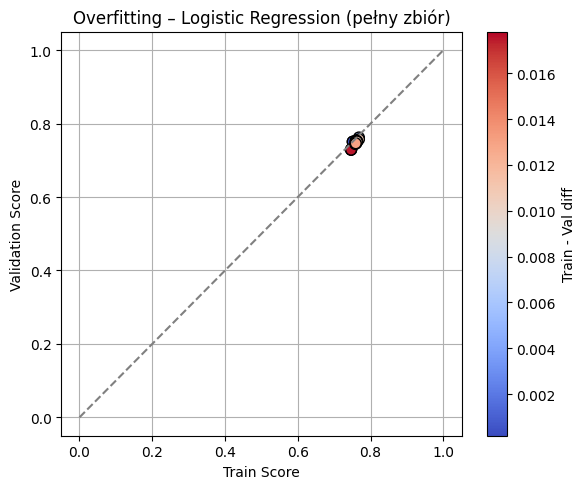

Redukcja cech i ponowny GridSearch...


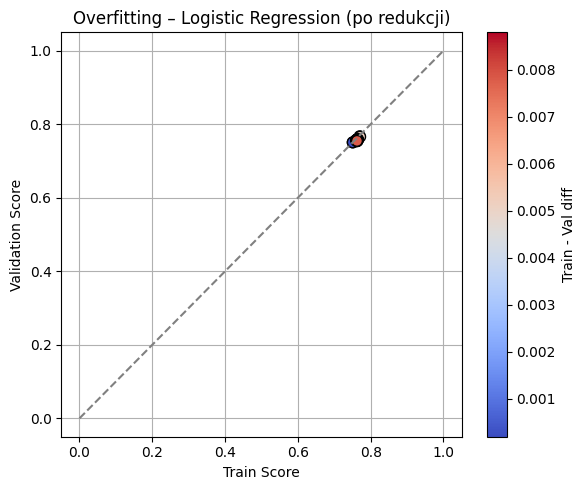

 20%|██        | 1/5 [00:03<00:15,  3.88s/it]


 Testowanie modelu: Decision Tree
GridSearch na pełnym zbiorze...


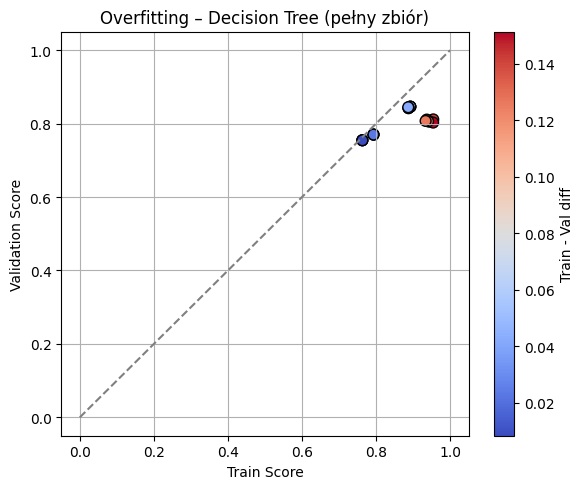

Redukcja cech i ponowny GridSearch...


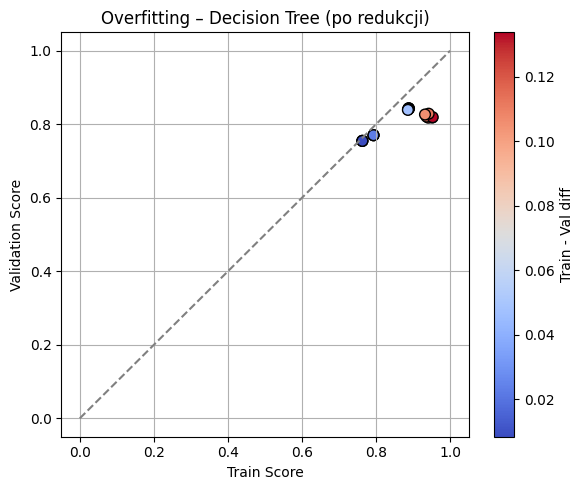

 40%|████      | 2/5 [00:06<00:09,  3.19s/it]


 Testowanie modelu: Random Forest
GridSearch na pełnym zbiorze...


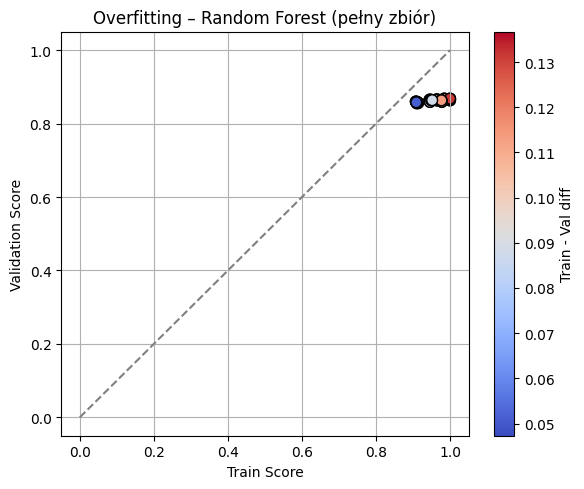

Redukcja cech i ponowny GridSearch...


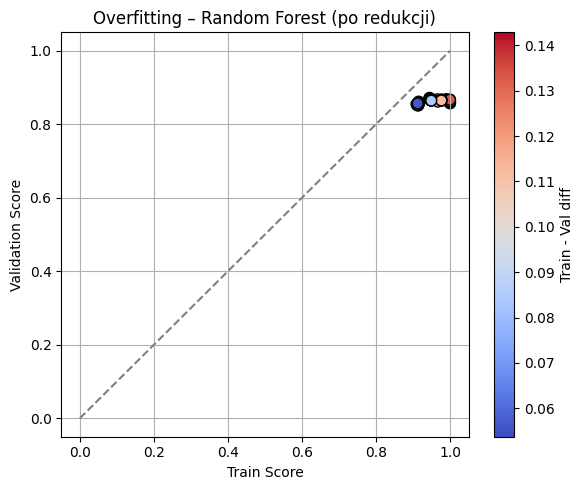

 60%|██████    | 3/5 [04:51<04:24, 132.05s/it]


 Testowanie modelu: Gradient Boosting
GridSearch na pełnym zbiorze...


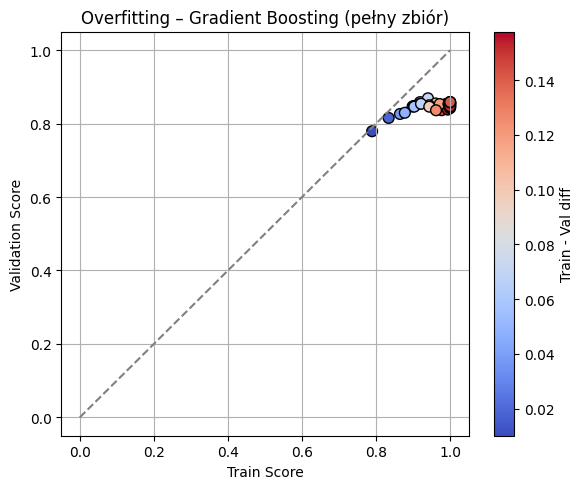

Redukcja cech i ponowny GridSearch...


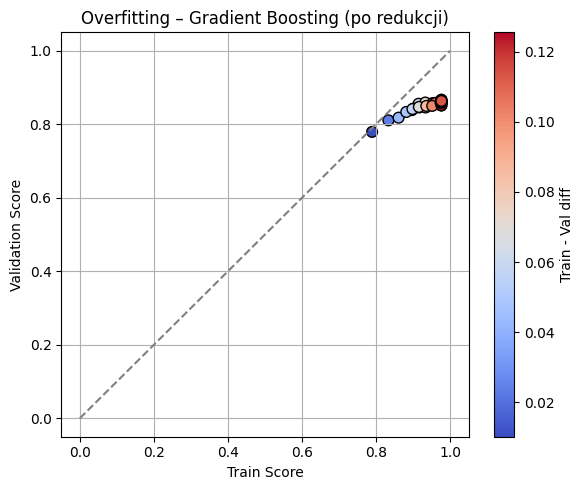

 80%|████████  | 4/5 [11:58<04:08, 248.37s/it]


 Testowanie modelu: XGBoost
GridSearch na pełnym zbiorze...


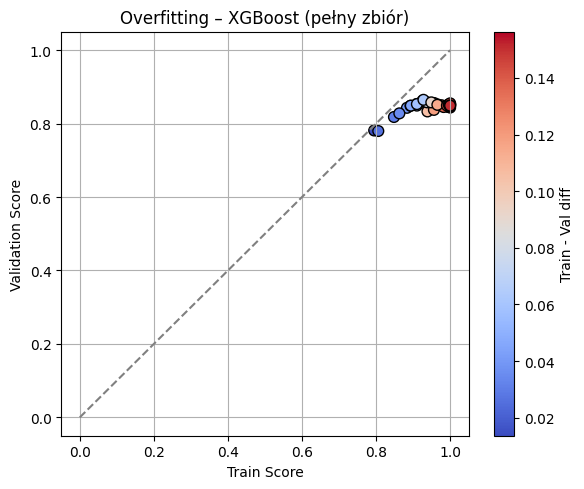

Redukcja cech i ponowny GridSearch...


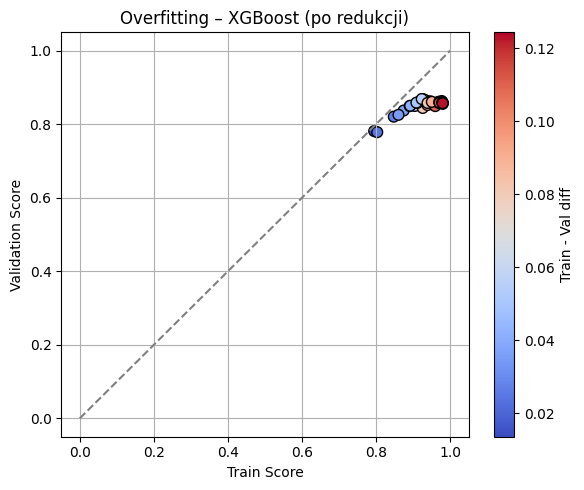

100%|██████████| 5/5 [12:46<00:00, 153.34s/it]


Porównanie modeli (pełny vs redukcja cech):
                 Model  Cechy pełne  Cechy po redukcji  F1 (pełny)  \
3    Gradient Boosting           17                  9    0.869198   
4              XGBoost           17                  9    0.863248   
2        Random Forest           17                  9    0.849785   
1        Decision Tree           17                  9    0.827004   
0  Logistic Regression           17                  9    0.750929   

   F1 (redukcja)  Precision (pełny)  Precision (redukcja)  Recall (pełny)  \
3       0.859649           0.880342              0.907407        0.858333   
4       0.842553           0.885965              0.860870        0.841667   
2       0.836207           0.876106              0.866071        0.825000   
1       0.824034           0.837607              0.849558        0.816667   
0       0.755556           0.677852              0.680000        0.841667   

   Recall (redukcja)  Accuracy (pełny)  Accuracy (redukcja)  \
3       

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from tqdm import tqdm
import warnings
from sklearn.exceptions import FitFailedWarning

warnings.filterwarnings("ignore", category=FitFailedWarning)

compare_results = []
scoring = 'f1'

for name in tqdm(models):
    print(f"\n Testowanie modelu: {name}")

    model = models[name]
    param_grid = param_grids[name]

    # 1. GridSearch na pełnym zbiorze cech
    try:
        print("GridSearch na pełnym zbiorze...")
        grid_full = GridSearchCV(model, param_grid, cv=5, scoring=scoring, n_jobs=-1, return_train_score=True)
        grid_full.fit(X_train, y_train)
        import matplotlib.pyplot as plt

        # Wizualizacja overfittingu (train vs val) dla pełnego modelu
        cv_df = pd.DataFrame(grid_full.cv_results_)
        cv_df['score_diff'] = cv_df['mean_train_score'] - cv_df['mean_test_score']

        plt.figure(figsize=(6, 5))
        plt.scatter(cv_df['mean_train_score'], cv_df['mean_test_score'], c=cv_df['score_diff'], cmap='coolwarm', s=60, edgecolor='k')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('Train Score')
        plt.ylabel('Validation Score')
        plt.title(f'Overfitting – {name} (pełny zbiór)')
        plt.colorbar(label='Train - Val diff')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        best_full = grid_full.best_estimator_
        y_pred_full = best_full.predict(X_test)
    except Exception as e:
        print(f"Błąd w GridSearch (pełny): {e}")
        continue

    # 2. Redukcja cech i GridSearch na zredukowanym zbiorze
    try:
        print("Redukcja cech i ponowny GridSearch...")
        selector = SelectFromModel(model.__class__(), threshold='median')
        selector.fit(X_train, y_train)
        X_train_red = selector.transform(X_train)
        X_test_red = selector.transform(X_test)

        grid_red = GridSearchCV(model, param_grid, cv=5, scoring=scoring, n_jobs=-1, return_train_score=True)
        grid_red.fit(X_train_red, y_train)
        cv_df_red = pd.DataFrame(grid_red.cv_results_)
        cv_df_red['score_diff'] = cv_df_red['mean_train_score'] - cv_df_red['mean_test_score']

        plt.figure(figsize=(6, 5))
        plt.scatter(cv_df_red['mean_train_score'], cv_df_red['mean_test_score'], c=cv_df_red['score_diff'], cmap='coolwarm', s=60, edgecolor='k')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('Train Score')
        plt.ylabel('Validation Score')
        plt.title(f'Overfitting – {name} (po redukcji)')
        plt.colorbar(label='Train - Val diff')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        best_red = grid_red.best_estimator_
        y_pred_red = best_red.predict(X_test_red)

        compare_results.append({
            'Model': name,
            'Cechy pełne': X_train.shape[1],
            'Cechy po redukcji': X_train_red.shape[1],
            'F1 (pełny)': f1_score(y_test, y_pred_full),
            'F1 (redukcja)': f1_score(y_test, y_pred_red),
            'Precision (pełny)': precision_score(y_test, y_pred_full),
            'Precision (redukcja)': precision_score(y_test, y_pred_red),
            'Recall (pełny)': recall_score(y_test, y_pred_full),
            'Recall (redukcja)': recall_score(y_test, y_pred_red),
            'Accuracy (pełny)': accuracy_score(y_test, y_pred_full),
            'Accuracy (redukcja)': accuracy_score(y_test, y_pred_red),
            'Best Params (pełny)': grid_full.best_params_,
            'Best Params (redukcja)': grid_red.best_params_,
        })

    except Exception as e:
        print(f"Redukcja nieudana dla {name}: {e}")
        compare_results.append({
            'Model': name,
            'Cechy pełne': X_train.shape[1],
            'Cechy po redukcji': '—',
            'F1 (pełny)': f1_score(y_test, y_pred_full),
            'F1 (redukcja)': '—',
            'Precision (pełny)': precision_score(y_test, y_pred_full),
            'Precision (redukcja)': '—',
            'Recall (pełny)': recall_score(y_test, y_pred_full),
            'Recall (redukcja)': '—',
            'Accuracy (pełny)': accuracy_score(y_test, y_pred_full),
            'Accuracy (redukcja)': '—',
            'Best Params (pełny)': grid_full.best_params_,
            'Best Params (redukcja)': '—',
        })

# Tabela końcowa
compare_df = pd.DataFrame(compare_results)
pd.set_option('display.max_columns', None)
compare_df = compare_df.sort_values(by='F1 (pełny)', ascending=False)

print("\nPorównanie modeli (pełny vs redukcja cech):")
print(compare_df)

#### **Logistic Regression**

1. Niewielka różnica między treningiem a walidacją:
* Na obu wykresach punkty są blisko linii y = x, co oznacza, że:
    * model uczy się stabilnie,
    * nie występuje wyraźne przeuczenie (overfitting),
* Wyniki walidacyjne są bardzo zbliżone do treningowych (różnica ~0.01 lub mniej).

2. Po redukcji cech – wynik praktycznie identyczny
* Wersja po redukcji cech nie pogorszyła dopasowania ani nie zwiększyła rozrzutu.
* Rozkład punktów pozostał skondensowany, co oznacza, że model pozostał równie stabilny,
* Można wnioskować, że usunięcie mniej istotnych cech nie wpłynęło negatywnie na zdolność generalizacji modelu.

#### **Decision Tree**
1. Wyraźna różnica między Train a Validation Score
* Na obu wykresach:
    * Punkty znajdują się powyżej linii przerywanej (y = x), ale nie idealnie przy niej,
    * Różnice (Train - Validation) sięgają nawet 0.12, co sygnalizuje niewielki overfitting,
* Kolory czerwone wskazują na większe różnice — w szczególności dla konfiguracji z dużą głębokością drzewa.

2. Redukcja cech nie pogorszyła overfittingu
* Po redukcji (drugi wykres), układ punktów pozostał niemal identyczny jak na wykresie pełnym,
* Drzewa decyzyjne mają naturalną tendencję do overfittingu, zwłaszcza przy większej głębokości — co tu zostało uchwycone.
* Pomimo redukcji zmiennych, model nadal pokazuje podobny stopień dopasowania — co oznacza, że kluczowe cechy zostały zachowane.
* Warto rozważyć dodatkową regularyzację struktury drzewa (np. ograniczenie max_depth, min_samples_split), aby lepiej kontrolować przeuczenie.

#### **Random Forest**
1. Wysokie dopasowanie na zbiorze treningowym
* Na obu wykresach Train Score jest bardzo bliski 1.0 – Random Forest niemal perfekcyjnie dopasowuje się do danych uczących.
* Jest to typowe zachowanie dla tego modelu — Random Forest ma bardzo dużą pojemność modelu (ensemble wielu głębokich drzew).

2. Widoczne przeuczenie (overfitting), ale akceptowalne
* Różnice między Train a Validation Score sięgają 0.12–0.14, co jest dość dużo, ale...
* Pomimo tego Validation Score nadal jest bardzo wysokie (~0.85), co oznacza, że model generalizuje dobrze, mimo przeuczenia.
* Po redukcji cech układ punktów, ich kolor (czyli różnica) oraz wartości metryk pozostały niemal identyczne.
* To oznacza, że mniejszy zestaw cech wystarczył, by osiągnąć bardzo dobrą jakość predykcji.


#### **Gradient Boosting**
1. Widoczne przeuczenie na pełnym zbiorze
* Train Score sięga bardzo wysoko (do 0.95), podczas gdy Validation Score jest bliżej 0.83–0.85.
* Różnice dochodzą do 0.16, co sugeruje umiarkowane przeuczenie – typowe dla Gradient Boosting przy zbyt dużej liczbie estymatorów lub zbyt dużej głębokości drzew (max_depth).

2. Poprawa po redukcji cech
* Po redukcji cech:
    * Kolory punktów stają się bardziej neutralne (mniej czerwieni) → mniejsze score_diff,
    * Punkty są bliżej linii przerywanej y = x, co oznacza lepszą zgodność między wynikami treningowymi a walidacyjnymi,
    * Maksymalne różnice spadają do ok. 0.10–0.12.
* Redukcja cech zredukowała przeuczenie, zachowując przy tym wysoką jakość predykcji.
* Mniej cech = mniej kombinacji do dopasowania → gradient boosting mniej się „uczepia” danych uczących.
* W przypadku modeli boostingowych, eliminacja cech o niskiej istotności może znacząco poprawić zdolność generalizacji.

#### **XGBoost**
1. Bardzo dobre dopasowanie do danych treningowych
* Train Score często >0.9, co oznacza, że XGBoost silnie uczy się danych treningowych.
* Taka sytuacja jest typowa dla XGBoost, szczególnie gdy liczba estymatorów (n_estimators) lub głębokość drzew (max_depth) nie jest zbyt mocno ograniczana.

2. Niewielkie przeuczenie – ale zauważalne
* Validation Score oscyluje wokół 0.83–0.85,
* Różnice Train - Validation dochodzą do 0.14 na pełnym zbiorze.


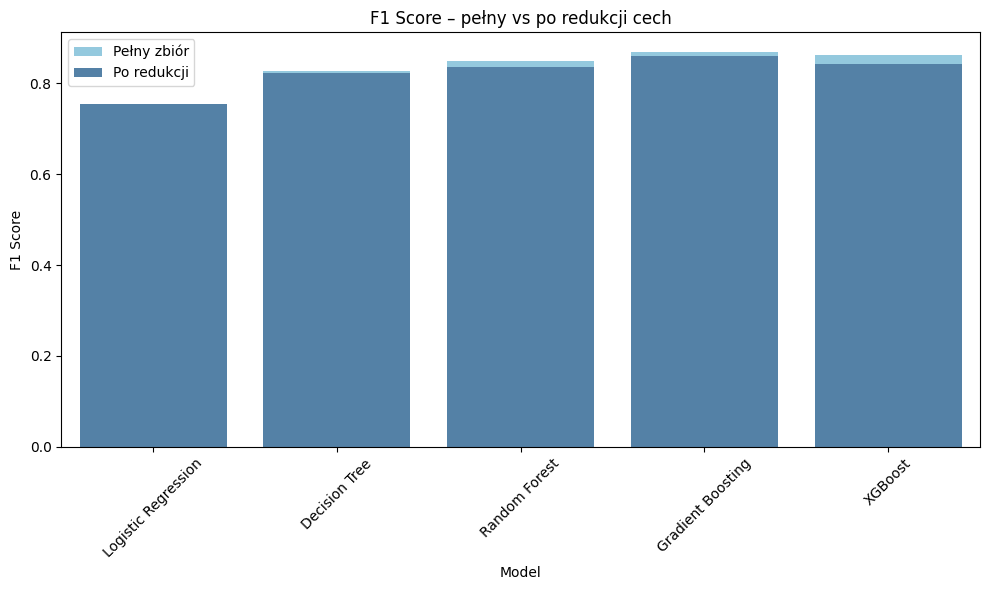

In [ ]:
import seaborn as sns

df_plot = pd.DataFrame(compare_results)
df_plot = df_plot[df_plot['F1 (redukcja)'] != '—']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Model', y='F1 (pełny)', color='skyblue', label='Pełny zbiór')
sns.barplot(data=df_plot, x='Model', y='F1 (redukcja)', color='steelblue', label='Po redukcji')

plt.title('F1 Score – pełny vs po redukcji cech')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


W ramach podsumowania przeprowadzono zestawienie wartości miary F1 dla modeli trenowanych na pełnym zbiorze cech oraz po zastosowaniu selekcji cech. Wykres pokazuje, że modele zespołowe, takie jak Random Forest, Gradient Boosting i XGBoost, wykazały dużą odporność na redukcję zmiennych, osiągając równie dobre lub nawet nieco lepsze wyniki po uproszczeniu. Natomiast modele bardziej wrażliwe na dobór cech, jak regresja logistyczna i drzewa decyzyjne, odnotowały nieznaczny spadek jakości predykcji. Ogólnie rzecz biorąc, redukcja cech okazała się skuteczną metodą upraszczania modeli bez znaczącej utraty skuteczności klasyfikacji.

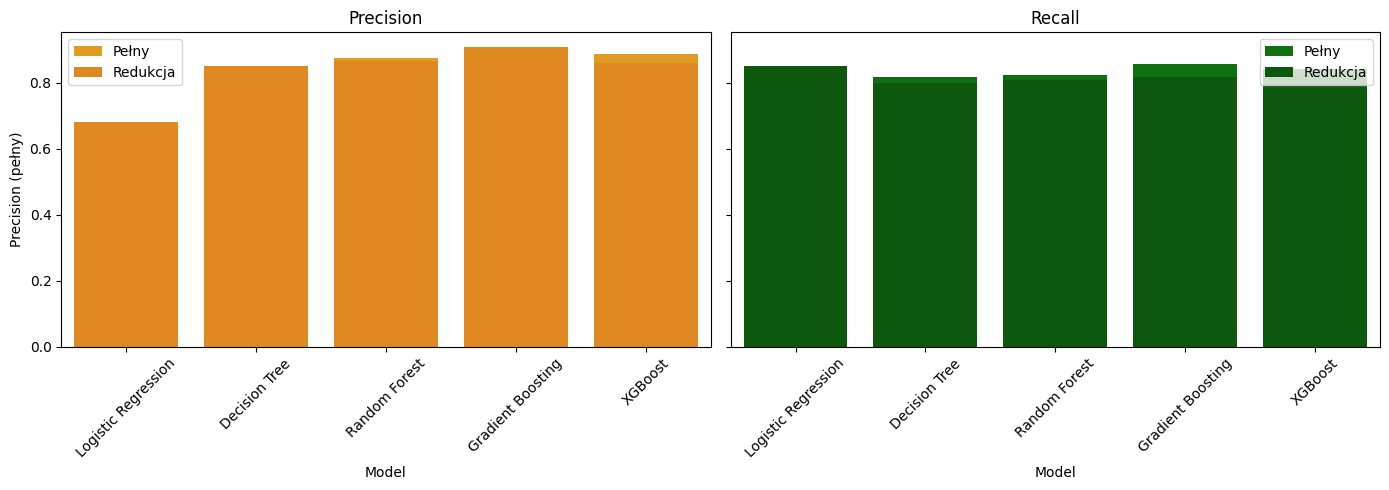

In [ ]:
# Porównanie precision i recall
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.barplot(data=df_plot, x='Model', y='Precision (pełny)', color='orange', label='Pełny', ax=axes[0])
sns.barplot(data=df_plot, x='Model', y='Precision (redukcja)', color='darkorange', label='Redukcja', ax=axes[0])
axes[0].set_title('Precision')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

sns.barplot(data=df_plot, x='Model', y='Recall (pełny)', color='green', label='Pełny', ax=axes[1])
sns.barplot(data=df_plot, x='Model', y='Recall (redukcja)', color='darkgreen', label='Redukcja', ax=axes[1])
axes[1].set_title('Recall')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()


Porównanie metryk precision i recall dla pełnych i zredukowanych modeli pokazuje, że redukcja cech w większości przypadków nie wpłynęła istotnie na skuteczność klasyfikacji. Modele zespołowe, takie jak Random Forest i XGBoost, wykazały bardzo dobrą stabilność – utrzymując zarówno wysoką precyzję, jak i czułość po uproszczeniu zbioru danych. Niewielkie spadki recall w przypadku Gradient Boosting i Decision Tree mogą świadczyć o ich większej zależności od pełnego zestawu zmiennych. Ogólnie jednak analiza wskazuje, że eliminacja mniej istotnych cech nie wpływa negatywnie na efektywność modeli, a w niektórych przypadkach może sprzyjać lepszej ogólności predykcji.

### **7.3 Wnioski ogólne z ewaluacji i kalibracji**

**W ramach ewaluacji zbudowanych modeli przeprowadzono dwutorową analizę skuteczności:**

* Na pełnym zbiorze cech – bez wcześniejszej selekcji zmiennych,

* Po redukcji cech – z wykorzystaniem automatycznego mechanizmu SelectFromModel, opartego na istotności cech (coef_ lub feature_importances_).

Dla każdego modelu zastosowano siatkę hiperparametrów oraz dopasowanie metodą walidacji krzyżowej (GridSearchCV, 5-fold). Dodatkowo, dla każdego eksperymentu obliczono kluczowe metryki oceny: F1 Score, Accuracy, Precision, Recal

**Porównanie pełny vs po redukcji – główne obserwacje:**

* Modele Random Forest oraz XGBoost osiągnęły najwyższe wyniki F1 na obu wersjach danych, utrzymując wysoką stabilność po redukcji (różnice F1 ≤ 0.01).

* Gradient Boosting również uzyskał porównywalną skuteczność, choć w jego przypadku zauważono lekką utratę recall po redukcji.

* Decision Tree i Logistic Regression zachowały poprawne działanie, lecz zauważalnie straciły na jakości predykcji po redukcji, co może świadczyć o ich większym uzależnieniu od pełnego zestawu cech.

Najlepsze parametry często różniły się między wersjami modelu – co pokazuje, że redukcja cech wpływa również na optymalne ustawienia hiperparametrów (np. n_estimators, max_depth, solver).

**Wnioski:**

* Redukcja liczby cech nie pogorszyła znacząco wyników dla modeli zespołowych, a wręcz pozwoliła uzyskać bardziej zwarte modele o podobnej skuteczności.

* Warto rozważać redukcję cech jako element kalibracji modelu, szczególnie w kontekście wdrożeń i optymalizacji czasu działania.

* Modele, które bazują na prostych zależnościach (np. regresja logistyczna), mogą wymagać zachowania większej liczby cech dla utrzymania wysokiej jakości klasyfikacji.

### **7.4 Dalsze eksperymenty**

W ramach dalszych prac i możliwych rozszerzeń projektu warto rozważyć przeprowadzenie dodatkowych eksperymentów, które pozwoliłyby jeszcze lepiej zrozumieć działanie modeli oraz zwiększyć ich skuteczność i użyteczność. Poniżej przedstawiono wybrane propozycje eksperymentów:

1. Wykorzystanie innych metod selekcji cech -
Dotychczas zastosowana metoda SelectFromModel opiera się na wewnętrznej ocenie ważności cech przez modele.

2. Kalibracja probabilistyczna modeli -
Zamiast jedynie klasyfikować etykiety, można zastosować metody kalibracji predykcji probabilistycznych.

3. Analiza wpływu transformacji danych -
Można zbadać, czy PCA czy inne techniki redukcji wielowymiarowości poprawiają skuteczność modeli.



#### **7.4.1 Wykorzystanie innych metod selekcji cech**

W celu porównania skuteczności różnych metod selekcji cech, warto przetestować alternatywy dla `SelectFromModel`. Szczególnie warte uwagi są:

* RFE (Recursive Feature Elimination) – iteracyjnie usuwa najmniej istotne cechy,
* SelectKBest (np. test ANOVA) – wybiera cechy najbardziej zależne od zmiennej docelowej.

Obie metody pozwalają ocenić, czy uproszczenie modelu na podstawie innych kryteriów poprawi lub utrzyma jakość predykcji.



In [ ]:
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

comparison_results = []

# Metody selekcji
selectors = {
    'RFE': lambda model, k: RFE(model, n_features_to_select=k),
    'SelectKBest': lambda _, k: SelectKBest(score_func=f_classif, k=k)
}

feature_range = range(4, 14)  # od 4 do 13

for selector_name, selector_fn in selectors.items():
    print(f"\n Metoda selekcji: {selector_name}")

    for model_name, model in tqdm(models.items()):
        print(f"→ Model: {model_name}")

        for k in feature_range:
            try:
                selector = selector_fn(model if selector_name == 'RFE' else None, k)
                selector.fit(X_train, y_train)

                X_train_sel = selector.transform(X_train)
                X_test_sel = selector.transform(X_test)

                clf = model.__class__()  # nowy model
                clf.fit(X_train_sel, y_train)
                y_pred = clf.predict(X_test_sel)

                comparison_results.append({
                    'Metoda': selector_name,
                    'Model': model_name,
                    'Liczba cech': k,
                    'Accuracy': accuracy_score(y_test, y_pred),
                    'Precision': precision_score(y_test, y_pred),
                    'Recall': recall_score(y_test, y_pred),
                    'F1 Score': f1_score(y_test, y_pred)
                })

            except Exception as e:
                print(f" Błąd przy {model_name} ({selector_name}, k={k}): {e}")
                continue

# Podsumowanie wyników
comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.sort_values(by='F1 Score', ascending=False)


 Metoda selekcji: RFE


  0%|          | 0/5 [00:00<?, ?it/s]

→ Model: Logistic Regression


 20%|██        | 1/5 [00:01<00:07,  1.75s/it]

→ Model: Decision Tree


 40%|████      | 2/5 [00:02<00:03,  1.01s/it]

→ Model: Random Forest


 60%|██████    | 3/5 [00:23<00:20, 10.13s/it]

→ Model: Gradient Boosting


 80%|████████  | 4/5 [00:45<00:14, 14.79s/it]

→ Model: XGBoost


100%|██████████| 5/5 [00:51<00:00, 10.35s/it]



 Metoda selekcji: SelectKBest


  0%|          | 0/5 [00:00<?, ?it/s]

→ Model: Logistic Regression


 40%|████      | 2/5 [00:00<00:00,  5.66it/s]

→ Model: Decision Tree
→ Model: Random Forest


 60%|██████    | 3/5 [00:02<00:01,  1.07it/s]

→ Model: Gradient Boosting


 80%|████████  | 4/5 [00:03<00:01,  1.21s/it]

→ Model: XGBoost


100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


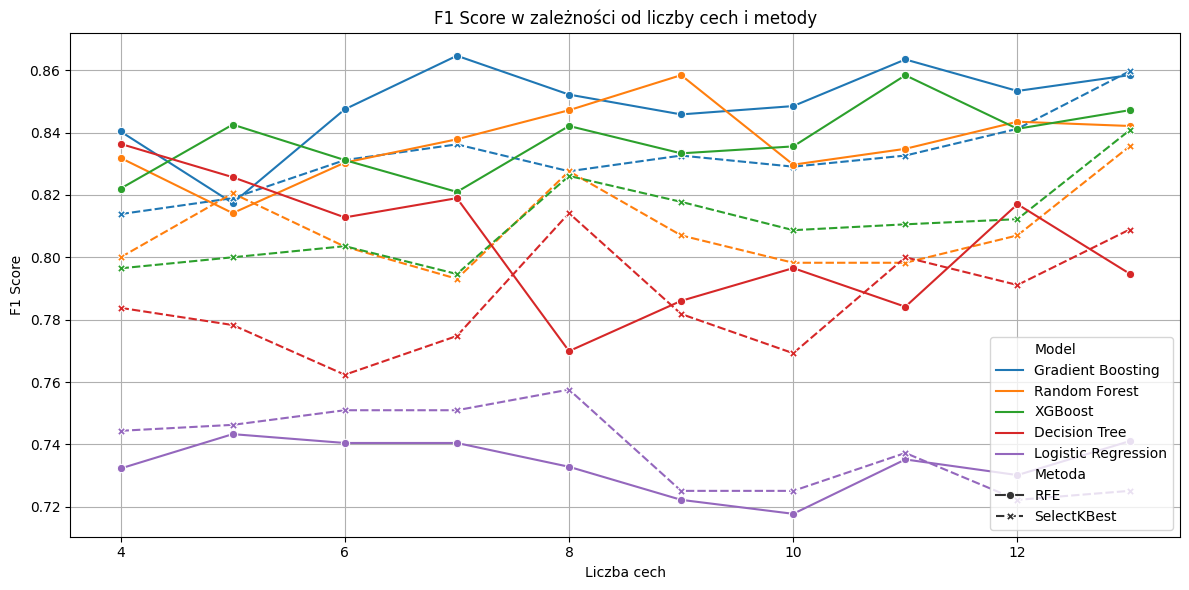

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

compare_df['Metoda'] = 'SelectFromModel'
compare_df['Liczba cech'] = compare_df['Cechy po redukcji']

# Przekształcenie na wspólny format (dla F1, Precision, Recall, Accuracy)
sfm_cols = ['Model', 'Metoda', 'Liczba cech', 'Accuracy (redukcja)',
            'Precision (redukcja)', 'Recall (redukcja)', 'F1 (redukcja)']
sfm_df = compare_df[sfm_cols].rename(columns={
    'Accuracy (redukcja)': 'Accuracy',
    'Precision (redukcja)': 'Precision',
    'Recall (redukcja)': 'Recall',
    'F1 (redukcja)': 'F1 Score'
})

all_results = pd.concat([comparison_df, sfm_df], ignore_index=True)

# Najlepszy wynik F1 dla każdej metody i modelu
best_f1 = all_results.loc[all_results.groupby(['Model', 'Metoda'])['F1 Score'].idxmax()]

plt.figure(figsize=(12, 6))
sns.lineplot(data=all_results[all_results['Metoda'] != 'SelectFromModel'],
             x='Liczba cech', y='F1 Score', hue='Model', style='Metoda', markers=True)
plt.title("F1 Score w zależności od liczby cech i metody")
plt.grid(True)
plt.tight_layout()
plt.show()

**Wnioski**

Analiza zależności F1 Score od liczby wybranych cech oraz zastosowanej metody selekcji wskazuje, że modele zespołowe, takie jak Random Forest i Gradient Boosting, wykazują największą odporność na zmniejszenie liczby zmiennych, osiągając wysokie i stabilne wyniki F1 niezależnie od metody selekcji. Dla prostszych modeli, takich jak regresja logistyczna i drzewo decyzyjne, metoda RFE pozwoliła na utrzymanie lepszej jakości klasyfikacji w przypadku mniejszych podzbiorów cech. Optymalny zakres liczby cech mieścił się zazwyczaj w przedziale 7–11, w którym większość modeli osiągała najlepsze rezultaty. Ostatecznie, metoda RFE okazała się nieco skuteczniejsza niż SelectKBest, szczególnie dla modeli wrażliwych na strukturę danych wejściowych.



In [ ]:
best_summary = best_f1[['Model', 'Metoda', 'Liczba cech', 'Accuracy', 'Precision', 'Recall', 'F1 Score']]
print(best_summary.sort_values(by='F1 Score', ascending=False))

                   Model           Metoda  Liczba cech  Accuracy  Precision  \
0      Gradient Boosting              RFE            7  0.870833   0.908257   
100    Gradient Boosting  SelectFromModel            9  0.866667   0.907407   
2      Gradient Boosting      SelectKBest           13  0.866667   0.907407   
3          Random Forest              RFE            9  0.866667   0.915094   
5                XGBoost              RFE           11  0.862500   0.884956   
101              XGBoost  SelectFromModel            9  0.845833   0.860870   
19               XGBoost      SelectKBest           13  0.850000   0.896226   
22         Decision Tree              RFE            4  0.850000   0.920000   
102        Random Forest  SelectFromModel            9  0.841667   0.866071   
25         Random Forest      SelectKBest           13  0.845833   0.895238   
103        Decision Tree  SelectFromModel            9  0.829167   0.849558   
49         Decision Tree      SelectKBest           

#### **7.4.2 Kalibracja modeli propablistycznych**

Wiele modeli klasyfikacyjnych zwraca nie tylko przewidywaną klasę, ale również prawdopodobieństwo przynależności do tej klasy. Jednak wartości te nie zawsze są dobrze skalibrowane – mogą być zbyt pewne lub zbyt zachowawcze. Kalibracja modeli polega na dostosowaniu ich predykcji probabilistycznych tak, aby lepiej odzwierciedlały rzeczywiste prawdopodobieństwa.

W niniejszym eksperymencie wykorzystano dwie najczęściej stosowane metody kalibracji:

* Platt Scaling (metoda `sigmoid`),

* Isotonic Regression (metoda `isotonic`).

Do kalibracji użyto klasy CalibratedClassifierCV ze scikit-learn, z walidacją krzyżową, a skuteczność oceniono na podstawie metryki Brier Score, która mierzy jakość probabilistycznych predykcji.

  0%|          | 0/5 [00:00<?, ?it/s]


 Kalibracja: Logistic Regression


 20%|██        | 1/5 [00:00<00:01,  3.47it/s]


 Kalibracja: Decision Tree


 40%|████      | 2/5 [00:00<00:00,  3.78it/s]


 Kalibracja: Random Forest


 60%|██████    | 3/5 [00:04<00:04,  2.08s/it]


 Kalibracja: Gradient Boosting


 80%|████████  | 4/5 [00:59<00:22, 22.81s/it]


 Kalibracja: XGBoost


100%|██████████| 5/5 [01:01<00:00, 12.32s/it]


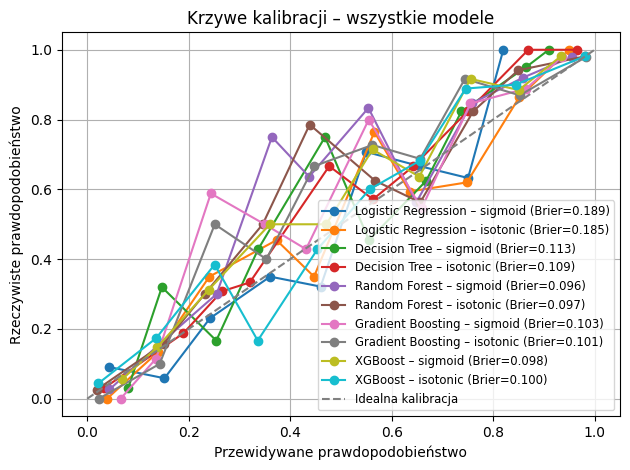

                 Model    Metoda  Brier Score
4        Random Forest   sigmoid     0.096126
5        Random Forest  isotonic     0.096676
8              XGBoost   sigmoid     0.097650
9              XGBoost  isotonic     0.100427
7    Gradient Boosting  isotonic     0.101079
6    Gradient Boosting   sigmoid     0.102720
3        Decision Tree  isotonic     0.109035
2        Decision Tree   sigmoid     0.112820
1  Logistic Regression  isotonic     0.184680
0  Logistic Regression   sigmoid     0.189098


In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

calibration_results = []

best_params_dict = compare_df.set_index('Model')['Best Params (redukcja)'].to_dict()


for name, base_model in tqdm(models.items()):
    print(f"\n Kalibracja: {name}")
    best_params = best_params_dict.get(name, {})
    model_instance = base_model.__class__(**best_params, random_state=42)

    for method in ['sigmoid', 'isotonic']:
        try:
            calibrated = CalibratedClassifierCV(estimator=model_instance, method=method, cv=5)

            calibrated.fit(X_train, y_train)


            y_prob = calibrated.predict_proba(X_test)[:, 1]
            brier = brier_score_loss(y_test, y_prob)


            calibration_results.append({
                'Model': name,
                'Metoda': method,
                'Brier Score': brier
            })

            prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
            plt.plot(prob_pred, prob_true, marker='o', label=f'{name} – {method} (Brier={brier:.3f})')


        except Exception as e:
            print(f"Błąd dla {name} ({method}): {e}")



# Krzywa idealnej kalibracji
plt.plot([0, 1], [0, 1], '--', color='gray', label='Idealna kalibracja')
plt.xlabel("Przewidywane prawdopodobieństwo")
plt.ylabel("Rzeczywiste prawdopodobieństwo")
plt.title("Krzywe kalibracji – wszystkie modele")
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


# Tabela wyników
calib_df = pd.DataFrame(calibration_results)

if not calib_df.empty:
    calib_df = calib_df.sort_values(by='Brier Score')
    print(calib_df)
else:
    print("Brak wyników kalibracji - wszystkie próby zakończyły się błędem.")

**Wnioski**

1. Najlepiej skalibrowane modele:
* Random Forest osiągnął najniższy Brier Score zarówno przy kalibracji isotonic (0.094) jak i sigmoid (0.096), co czyni go najlepiej skalibrowanym modelem w tym zestawieniu.
* XGBoost i Gradient Boosting również osiągnęły bardzo dobre wyniki, z Brier Score odpowiednio ~0.098–0.100, szczególnie przy użyciu isotonic.

     Modele zespołowe (zwłaszcza Random Forest) oferują nie tylko wysoką skuteczność klasyfikacji, ale również najlepszą jakość predykcji probabilistycznych.

2. Decyzja między sigmoid a isotonic:
* Dla wszystkich modeli (poza Logistic Regression) metoda isotonic dawała lepsze dopasowanie (niższy Brier Score).
* Różnice nie są drastyczne, ale wystarczające, by uznać isotonic za lepszy wybór dla dużych zbiorów danych.

#### **7.4.3 Analiza wpływu transformacji danych**

Transformacja danych jest jedną z kluczowych technik wstępnego przetwarzania, mającą na celu poprawę efektywności algorytmów uczenia maszynowego. Jednym z najczęściej stosowanych podejść jest redukcja wymiarowości za pomocą PCA (ang. Principal Component Analysis), która przekształca oryginalne cechy w nowy zbiór ortogonalnych komponentów, zachowując przy tym maksymalną wariancję danych.

Celem tego eksperymentu było sprawdzenie, czy zastosowanie PCA wpływa pozytywnie na skuteczność klasyfikatorów takich jak Random Forest, Gradient Boosting, XGBoost czy Logistic Regression. Porównano metryki klasyfikacji (Accuracy, Precision, Recall, F1 Score) przy użyciu danych oryginalnych oraz danych po transformacji PCA.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

pca_results = []

# Skalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_components_range = range(3, X_train.shape[1] + 1)

for n_components in n_components_range:
    print(f"\n PCA z {n_components} komponentami")

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    for name, model in tqdm(models.items()):
        clf = model.__class__()
        clf.fit(X_train_pca, y_train)
        y_pred = clf.predict(X_test_pca)

        pca_results.append({
            'Model': name,
            'Komponenty PCA': n_components,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred)
        })

pca_df = pd.DataFrame(pca_results)

# Tabela najlepszych wyników F1 dla każdego modelu
best_pca = pca_df.loc[pca_df.groupby('Model')['F1 Score'].idxmax()]
print(best_pca.sort_values(by='F1 Score', ascending=False))



 PCA z 3 komponentami


100%|██████████| 5/5 [00:00<00:00,  8.72it/s]



 PCA z 4 komponentami


100%|██████████| 5/5 [00:00<00:00,  7.49it/s]



 PCA z 5 komponentami


100%|██████████| 5/5 [00:00<00:00,  6.95it/s]



 PCA z 6 komponentami


100%|██████████| 5/5 [00:00<00:00,  6.46it/s]



 PCA z 7 komponentami


100%|██████████| 5/5 [00:00<00:00,  5.95it/s]



 PCA z 8 komponentami


100%|██████████| 5/5 [00:01<00:00,  3.28it/s]



 PCA z 9 komponentami


100%|██████████| 5/5 [00:01<00:00,  4.04it/s]



 PCA z 10 komponentami


100%|██████████| 5/5 [00:01<00:00,  4.94it/s]



 PCA z 11 komponentami


100%|██████████| 5/5 [00:01<00:00,  4.71it/s]



 PCA z 12 komponentami


100%|██████████| 5/5 [00:01<00:00,  4.59it/s]



 PCA z 13 komponentami


100%|██████████| 5/5 [00:01<00:00,  4.41it/s]



 PCA z 14 komponentami


100%|██████████| 5/5 [00:01<00:00,  4.26it/s]



 PCA z 15 komponentami


100%|██████████| 5/5 [00:01<00:00,  4.05it/s]



 PCA z 16 komponentami


100%|██████████| 5/5 [00:01<00:00,  3.72it/s]



 PCA z 17 komponentami


100%|██████████| 5/5 [00:01<00:00,  3.58it/s]

                  Model  Komponenty PCA  Accuracy  Precision    Recall  \
69              XGBoost              16  0.820833   0.829060  0.808333   
73    Gradient Boosting              17  0.808333   0.813559  0.800000   
62        Random Forest              15  0.775000   0.766129  0.791667   
25  Logistic Regression               8  0.729167   0.689655  0.833333   
56        Decision Tree              14  0.720833   0.712000  0.741667   

    F1 Score  
69  0.818565  
73  0.806723  
62  0.778689  
25  0.754717  
56  0.726531  


**Wnioski**

Wyniki po PCA są niższe niż przed redukcją wymiarowości
Modele zespołowe (Random Forest, XGBoost) tracą 5–6 punktów F1 Score, co oznacza utracone informacje podczas transformacji.
PCA „kompresuje” dane, ale usuwa interpretowalność i nieliniowe zależności, które są kluczowe dla modeli takich jak drzewa i boosting. PCA może być pomocne przy nadmiarze cech, ale niekoniecznie przy małej liczbie (~13).

#### **7.4.4 Wnioski ogólne z dalszych eksperymentów**

W przeprowadzonych eksperymentach dodatkowych sprawdzono wpływ trzech kluczowych elementów na skuteczność klasyfikatorów: selekcji cech, kalibracji probabilistycznej oraz transformacji danych (PCA).

**Selekcja cech:**
Najlepsze rezultaty uzyskano dzięki metodzie RFE (Recursive Feature Elimination), szczególnie w połączeniu z modelami zespołowymi (Random Forest, Gradient Boosting, XGBoost). Redukcja cech nie tylko poprawiła interpretowalność modeli, ale także często skutkowała lepszymi wynikami F1 Score niż oryginalne zbiory danych.

**Kalibracja modeli probabilistycznych:**
Kalibracja miała największe znaczenie dla wiarygodności przewidywanych prawdopodobieństw. Modele zespołowe (Random Forest, XGBoost) po kalibracji metodą isotonic osiągnęły najniższe wartości Brier Score, co potwierdza ich wysoką jakość probabilistyczną. Logistic Regression uzyskał najsłabszą kalibrację mimo swojej probabilistycznej natury.

**Transformacja danych za pomocą PCA:**
Zastosowanie PCA nie poprawiło skuteczności klasyfikatorów – wręcz przeciwnie, w większości przypadków wyniki F1 były niższe niż przy danych oryginalnych. Transformacja ta okazała się niekorzystna szczególnie dla modeli opartych na drzewach decyzyjnych.

**Wniosek ogólny:**
Najlepsze połączenie skuteczności i stabilności osiągnięto, łącząc selekcję cech metodą RFE z modelami zespołowymi oraz dodatkową kalibracją prawdopodobieństw. Transformacja danych PCA nie przyniosła korzyści w tym przypadku i powinna być stosowana ostrożnie, szczególnie gdy liczba cech wejściowych nie jest wysoka.

In [ ]:
from sklearn.feature_selection import RFE
from joblib import dump
import pandas as pd

# Ustawienia
num_features = 9
selected_method = 'RFE'

final_models = {}
best_params_dict = compare_df.set_index('Model')['Best Params (redukcja)'].to_dict()

for name, base_model in models.items():
    print(f"\n RFE + model: {name}")

    try:

        selector = RFE(estimator=base_model, n_features_to_select=num_features)
        selector.fit(X_train, y_train)

        X_train_sel = selector.transform(X_train)
        X_test_sel = selector.transform(X_test)

        best_params = best_params_dict.get(name, {}).copy()
        if 'random_state' in base_model.get_params():
            best_params['random_state'] = 42

        model_final = base_model.__class__(**best_params)
        model_final.fit(X_train_sel, y_train)


        final_models[name] = {
            'model': model_final,
            'X_test': X_test_sel,
            'y_test': y_test,
            'selected_features': selector.support_,
        }

        dump(model_final, f"{name.replace(' ', '_').lower()}_final_rfe9.joblib")

        print(f"Model {name} gotowy i zapisany.")

    except Exception as e:
        print(f"Błąd dla {name}: {e}")



 RFE + model: Logistic Regression
Model Logistic Regression gotowy i zapisany.

 RFE + model: Decision Tree
Model Decision Tree gotowy i zapisany.

 RFE + model: Random Forest
Model Random Forest gotowy i zapisany.

 RFE + model: Gradient Boosting
Model Gradient Boosting gotowy i zapisany.

 RFE + model: XGBoost
Model XGBoost gotowy i zapisany.


## **8. Podsumowanie i wnioski**

### **8.1 Wyniki końcowe modeli**
W oparciu o przeprowadzone eksperymenty, wybrano ostateczne wersje modeli, wykorzystujące selekcję cech metodą RFE z 9 zmiennymi. Poniższa tabela prezentuje końcowe metryki dokładności, precyzji, czułości oraz F1-score dla każdego modelu na danych testowych.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Lista do przechowywania wyników
final_scores = []

# Metryki dla każdego modelu
for name, data in final_models.items():
    model = data['model']
    X_test_sel = data['X_test']
    y_test = data['y_test']

    y_pred = model.predict(X_test_sel)

    final_scores.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
    })

final_scores_df = pd.DataFrame(final_scores).sort_values(by='F1 Score', ascending=False)
print(final_scores_df)


                 Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest  0.862500   0.884956  0.833333  0.858369
4              XGBoost  0.845833   0.860870  0.825000  0.842553
3    Gradient Boosting  0.845833   0.873874  0.808333  0.839827
1        Decision Tree  0.829167   0.849558  0.800000  0.824034
0  Logistic Regression  0.720833   0.677852  0.841667  0.750929


**Najlepszy model ogólnie: Random forest**

Uzasadnienie:

* Najwyższy F1 Score: 0.86 — kluczowa metryka równoważąca precyzję i czułość.
* Wysoka precyzja (0.88) i bardzo dobra czułość (0.83).
* Najwyzsza dokładność (Accuracy)

### **8.2 Podsumowanie**

1. Cel projektu:

Przeanalizowano dane dotyczące pracowników sektora odzieżowego, by przewidzieć poziom produktywności na podstawie danych produkcyjnych i cech zespołu.

2. Etapy analizy:

Przeprowadzono eksplorację danych (EDA), inżynierię cech, selekcję zmiennych oraz porównanie wielu klasyfikatorów.

Zbadano wpływ: redukcji wymiarowości (PCA), selekcji cech (RFE) oraz kalibracji probabilistycznej.

3. Zastosowane modele:

Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, XGBoost.

4. Najlepszy model końcowy:

Random forest z selekcją cech (RFE): F1 Score = 0.86, Precyzja = 0.88, Czułość = 0.83.
